# Домашнее задание № 1

Вам необходимо провести анализ и подготовить данные.

# Исходные данные

Ознакомьтесь с данными в [источнике](https://www.kaggle.com/uciml/student-alcohol-consumption?select=student-por.csv):

Если вкратце, то у вас есть 29 параметров и одна целевая переменная G3.

In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
# Читаем данные

X_train = pd.read_csv('train_features_with_answers.csv')

In [3]:
# Про характеристики прочитайте в источнике

X_train.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
0,MS,M,NaN,U,LE3,T,1,3,at_home,services,...,yes,yes,4,3,3,2,3,3,0,9
1,GP,M,NaN,R,LE3,T,3,3,teacher,other,...,yes,no,3,3,4,3,5,3,16,12
2,GP,M,15.0,NaN,GT3,T,3,4,other,other,...,yes,no,5,5,1,1,1,5,0,13
3,MS,M,17.0,R,GT3,T,4,3,services,other,...,yes,yes,4,5,5,1,3,2,4,11
4,GP,F,20.0,R,GT3,T,2,1,other,other,...,yes,yes,1,2,3,1,2,2,8,12


# Часть 1. Визуальный анализ данных (Exploratory Data Analysis)

Перед тем, как приступать к построению алгоритмов, необходимо понять данные, с которыми требуется работать. Для этого в подходах к построению алгоритмов машинного обучения выделят специальный этап - Разведочный анализ данных или Exploratory Data Analysis (EDA). EDA в себя включает все те, что касается описания данных: визуализацию, интерпретацию и анализ.

Прежде всего сделаем визуализацию данных для того, чтобы оценить диапазоны значений и виды их распределений.

Постройте для приведенных ниже характеристик следующие виды графиков:
- Гистограммы;
- Круговые диаграмм;
- Графики;
- Таблицы;
- 3D диаграммы.

Выберите наиболее подходящий тип графика для каждой характеристки.

__Основной критерий оценивания__ - читаемость и интерпретируемость данных.

## Характеристика: "Sex"

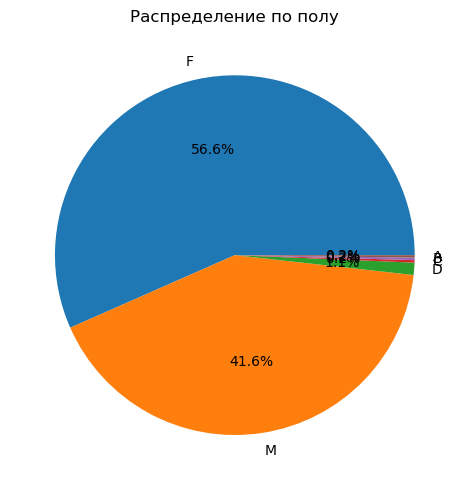

In [4]:
# Круговая диаграмма для пола
plt.figure(figsize=(10, 5))
sex_counts = X_train['sex'].value_counts()
plt.pie(sex_counts.values, labels=sex_counts.index, autopct='%1.1f%%')
plt.title('Распределение по полу')
plt.tight_layout()
plt.show()

## Характеристика: "Age"

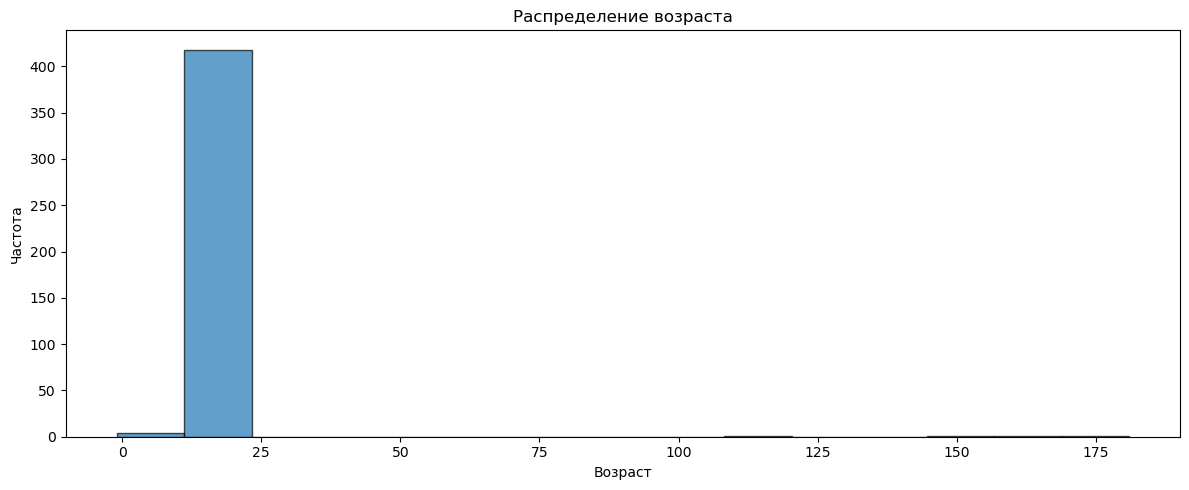

In [5]:
# Гистограмма для возраста
plt.figure(figsize=(12, 5))
plt.hist(X_train['age'].dropna(), bins=15, edgecolor='black', alpha=0.7)
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.title('Распределение возраста')
plt.tight_layout()
plt.show()

## Характеристика: "Weekly study time"

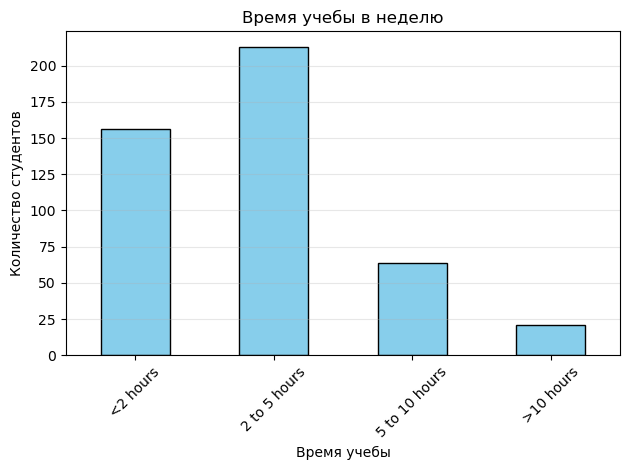

In [6]:
if X_train['studytime'].dtype in ['int64', 'float64']:
    studytime_mapping = {
        1: '<2 hours',
        2: '2 to 5 hours', 
        3: '5 to 10 hours',
        4: '>10 hours'
    }
    studytime_labels = X_train['studytime'].map(studytime_mapping)
else:
    studytime_labels = X_train['studytime']

studytime_counts = studytime_labels.value_counts()
studytime_order = ['<2 hours', '2 to 5 hours', '5 to 10 hours', '>10 hours']

studytime_counts = studytime_counts.reindex(studytime_order)

studytime_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Время учебы в неделю')
plt.xlabel('Время учебы')
plt.ylabel('Количество студентов')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## Характеристика: "Romantic Relationship"

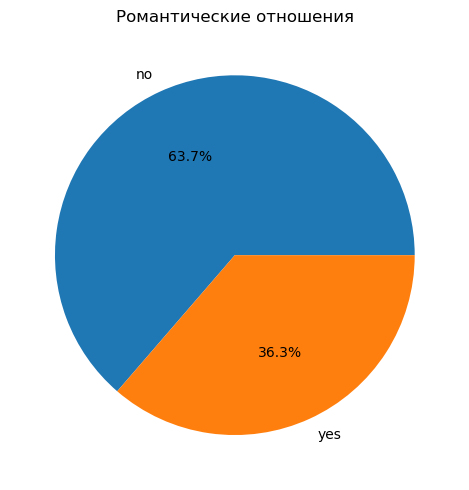

In [7]:
# Круговая диаграмма для романтических отношений
plt.figure(figsize=(10, 5))
romantic_counts = X_train['romantic'].value_counts()
plt.pie(romantic_counts.values, labels=romantic_counts.index, autopct='%1.1f%%')
plt.title('Романтические отношения')
plt.tight_layout()
plt.show()

## Характеристика: "Alcohol Consumption"

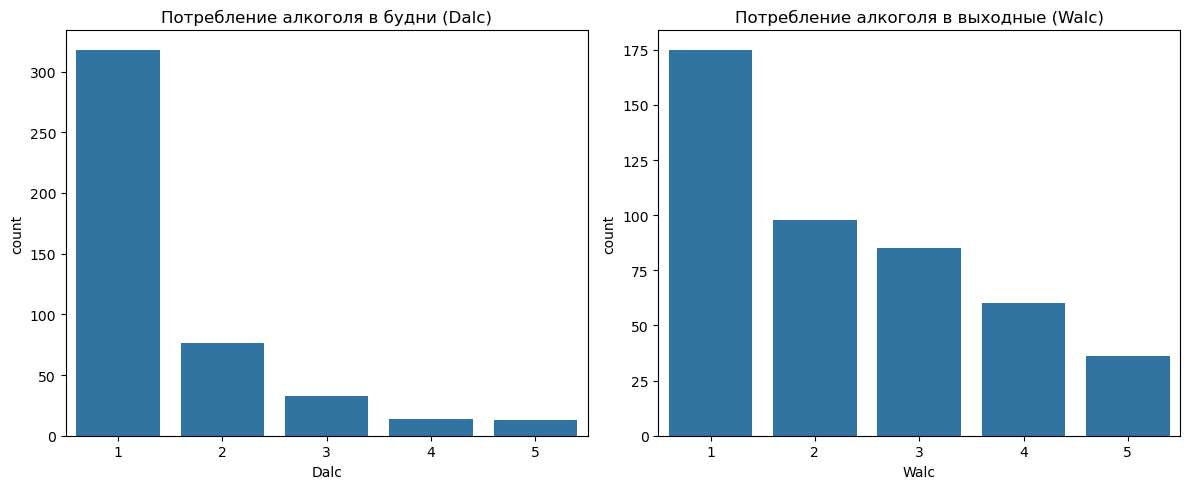

In [8]:
# Графики для потребления алкоголя
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='Dalc', data=X_train)
plt.title('Потребление алкоголя в будни (Dalc)')

plt.subplot(1, 2, 2)
sns.countplot(x='Walc', data=X_train)
plt.title('Потребление алкоголя в выходные (Walc)')
plt.tight_layout()
plt.show()

## Целевая зависимость: "G3" (Final Grade)

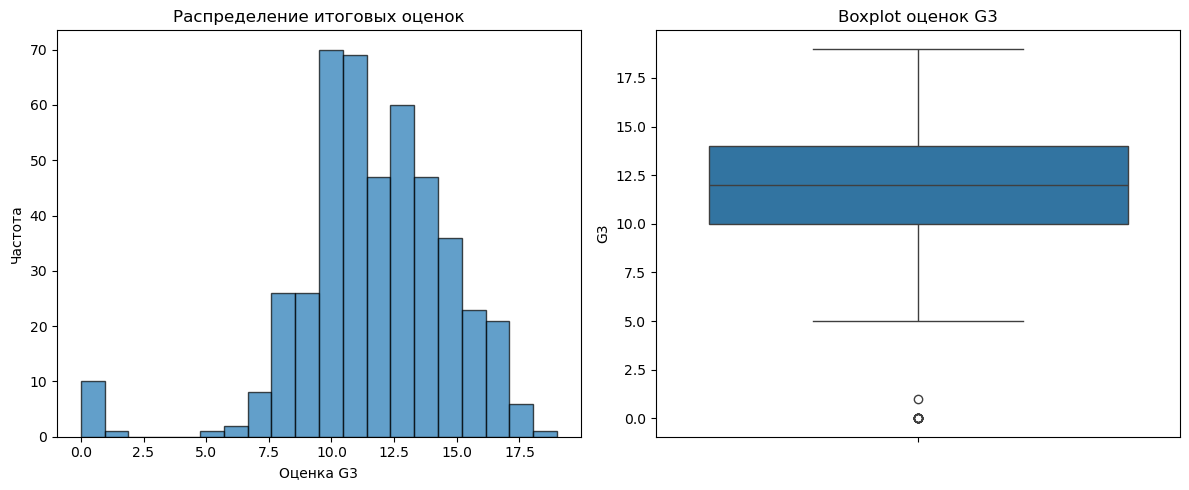

In [9]:
# Распределение итоговых оценок
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(X_train['G3'], bins=20, edgecolor='black', alpha=0.7)
plt.xlabel('Оценка G3')
plt.ylabel('Частота')
plt.title('Распределение итоговых оценок')

plt.subplot(1, 2, 2)
sns.boxplot(y=X_train['G3'])
plt.title('Boxplot оценок G3')
plt.tight_layout()
plt.show()

## Прочие характеристики

Прочитайте описание данных на [сайте](https://www.kaggle.com/uciml/student-alcohol-consumption) и подумайте, какие еще характеристики было бы полезно проанализировать. Постройте соответсвующие графики для выбранных характеристик.

Постройте графики еще для минимум 4 характеристик: числовая (2) и категориальная (2), применив хотя бы один раз:
- pieplot
- boxplot
- violinplot

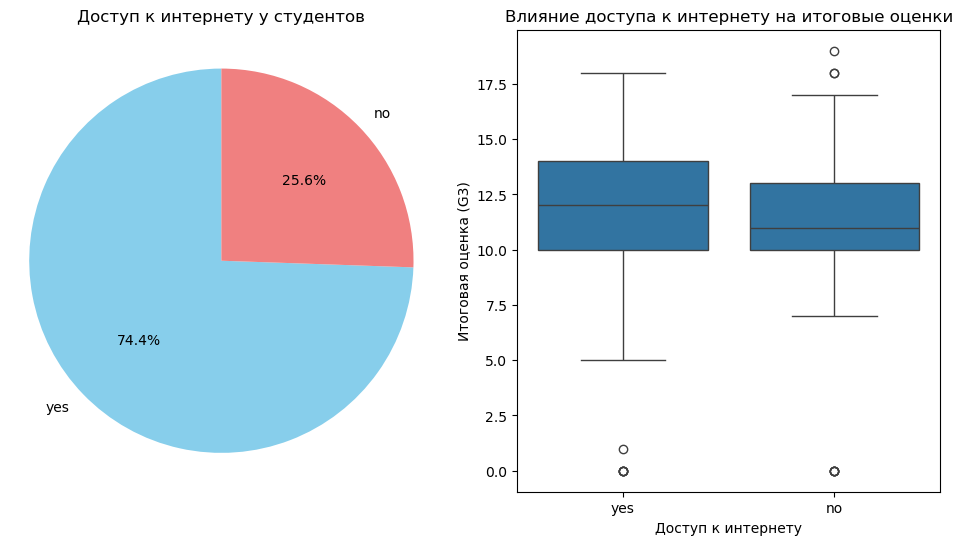

In [10]:
# Круговая диаграмма для доступа к интернету
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
internet_counts = X_train['internet'].value_counts()
plt.pie(internet_counts.values, labels=internet_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'], startangle=90)
plt.title('Доступ к интернету у студентов')
plt.axis('equal')

# Boxplot: влияние интернета на оценки
plt.subplot(1, 2, 2)
sns.boxplot(x='internet', y='G3', data=X_train)
plt.title('Влияние доступа к интернету на итоговые оценки')
plt.xlabel('Доступ к интернету')
plt.ylabel('Итоговая оценка (G3)')
plt.show()

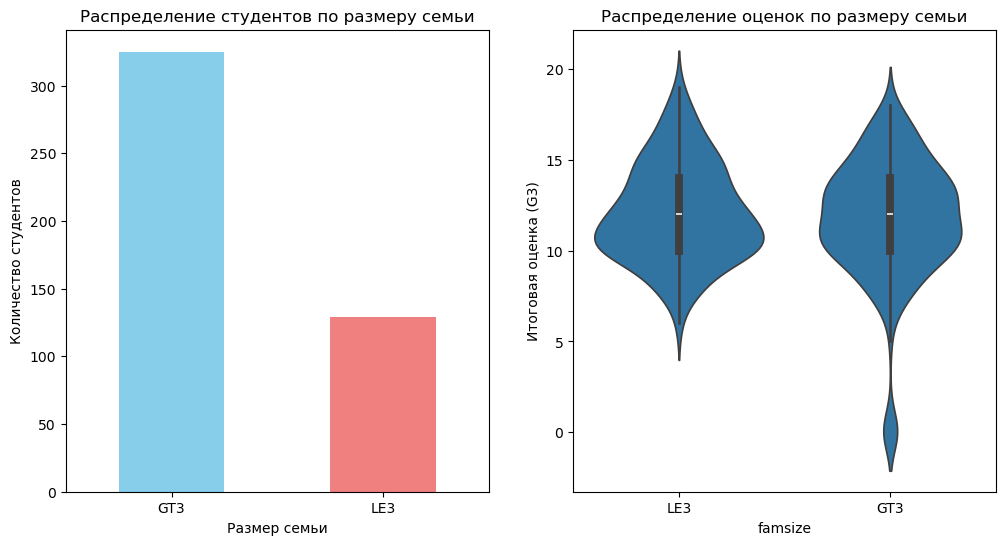

In [11]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
famsize_counts = X_train['famsize'].value_counts()
famsize_counts.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Распределение студентов по размеру семьи')
plt.xlabel('Размер семьи')
plt.ylabel('Количество студентов')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
sns.violinplot(x='famsize', y='G3', data=X_train)
plt.title('Распределение оценок по размеру семьи')
plt.ylabel('Итоговая оценка (G3)')
plt.show()

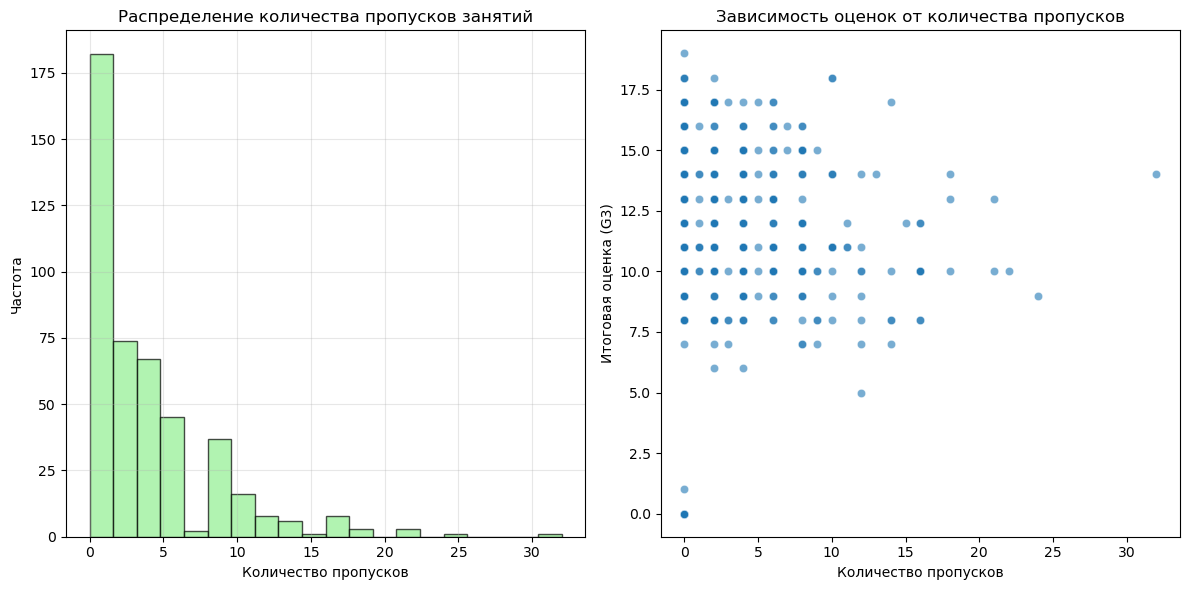

In [12]:
# Гистограмма пропусков
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(X_train['absences'], bins=20, edgecolor='black', alpha=0.7, color='lightgreen')
plt.title('Распределение количества пропусков занятий')
plt.xlabel('Количество пропусков')
plt.ylabel('Частота')
plt.grid(alpha=0.3)

plt.subplot(1, 2, 2)
sns.scatterplot(x='absences', y='G3', data=X_train, alpha=0.6)
plt.title('Зависимость оценок от количества пропусков')
plt.xlabel('Количество пропусков')
plt.ylabel('Итоговая оценка (G3)')
plt.tight_layout()
plt.show()

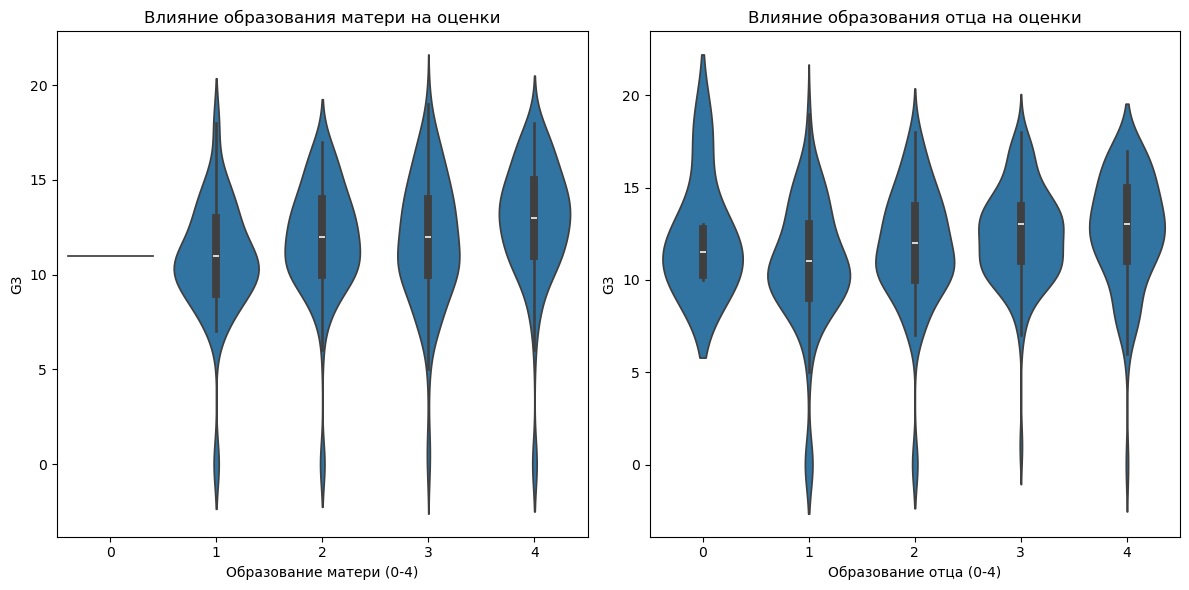

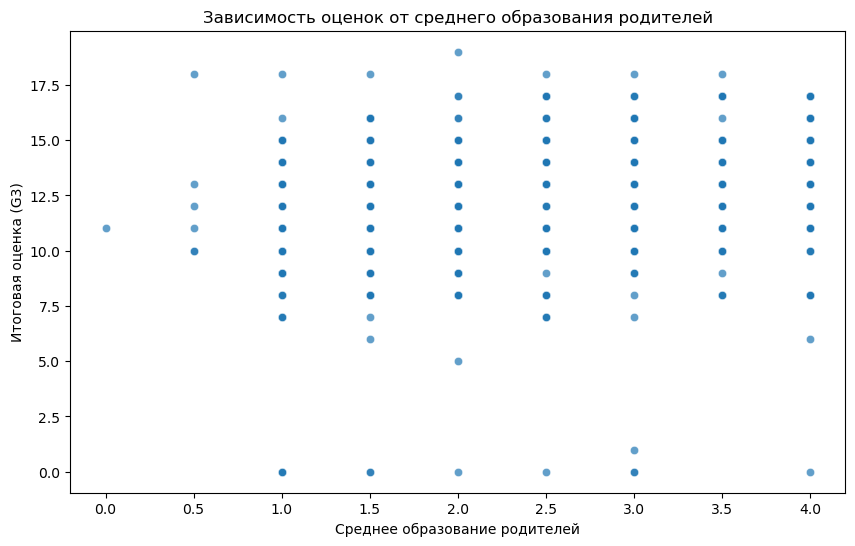

In [13]:
X_train['parent_edu'] = (X_train['Medu'] + X_train['Fedu']) / 2
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.violinplot(x='Medu', y='G3', data=X_train)
plt.title('Влияние образования матери на оценки')
plt.xlabel('Образование матери (0-4)')

plt.subplot(1, 2, 2)
sns.violinplot(x='Fedu', y='G3', data=X_train)
plt.title('Влияние образования отца на оценки')
plt.xlabel('Образование отца (0-4)')

plt.tight_layout()
plt.show()

# Общее образование родителей vs оценки
plt.figure(figsize=(10, 6))
sns.scatterplot(x='parent_edu', y='G3', data=X_train, alpha=0.7)
plt.title('Зависимость оценок от среднего образования родителей')
plt.xlabel('Среднее образование родителей')
plt.ylabel('Итоговая оценка (G3)')
plt.show()

X_train.__delitem__('parent_edu')

## Корреляция признаков

Для того, чтобы быстро получить оценку о взаимосвязи признаков целесообразно построить матрицу их корреляции. Постройте матрицу корреляции.

In [14]:
numeric_data = X_train.select_dtypes(include=[np.number])

numeric_data_clean = numeric_data.dropna()

print(f"Размер данных для корреляции: {numeric_data_clean.shape}")
print("Числовые столбцы для анализа:")
print(numeric_data_clean.columns.tolist())

Размер данных для корреляции: (426, 14)
Числовые столбцы для анализа:
['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G3']


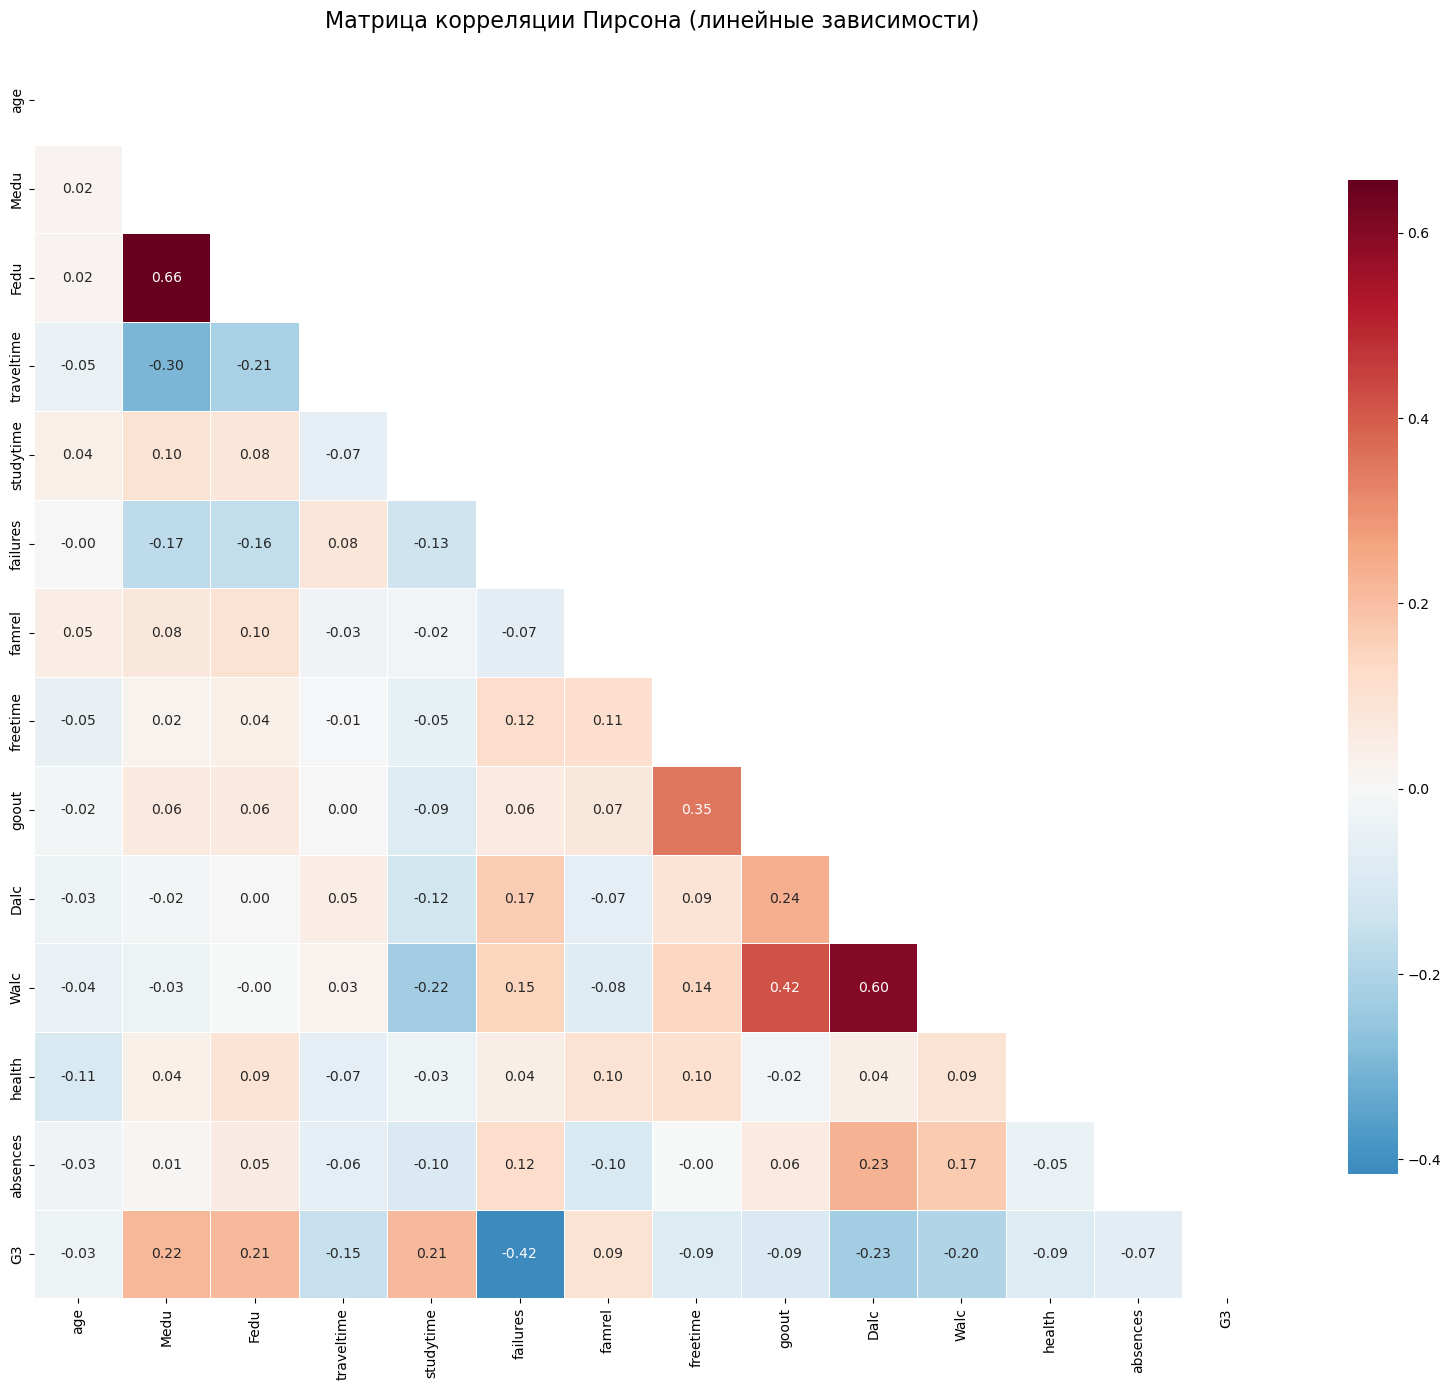

Топ-15 самых сильных корреляций Пирсона:
Medu       Fedu          0.656809
Dalc       Walc          0.601293
goout      Walc          0.416770
failures   G3           -0.415806
freetime   goout         0.350170
Medu       traveltime   -0.300655
goout      Dalc          0.238838
Dalc       G3           -0.228213
           absences      0.226920
studytime  Walc         -0.224218
Medu       G3            0.218860
Fedu       G3            0.210911
           traveltime   -0.210812
studytime  G3            0.209685
Walc       G3           -0.195629
dtype: float64


In [15]:
# Матрица корреляции Пирсона
plt.figure(figsize=(16, 14))
pearson_corr = numeric_data_clean.corr(method='pearson')

# Создаем маску для верхнего треугольника
mask = np.triu(np.ones_like(pearson_corr, dtype=bool))
pearson_corr *= ~mask
# Тепловая карта корреляции Пирсона
sns.heatmap(pearson_corr, mask=mask, annot=True, cmap='RdBu_r', center=0,
            fmt='.2f', linewidths=0.5, cbar_kws={'shrink': 0.8})
plt.title('Матрица корреляции Пирсона (линейные зависимости)', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

# Выведем наиболее сильно коррелирующие пары признаков
print("Топ-15 самых сильных корреляций Пирсона:")
pearson_corr_unstacked = pearson_corr.unstack()
pearson_corr_sorted = pearson_corr_unstacked.sort_values(key=abs, ascending=False)
# Убираем корреляции с самими собой
pearson_corr_sorted = pearson_corr_sorted[pearson_corr_sorted != 1.0]
print(pearson_corr_sorted.head(15))

## Посчитайте корреляцию Спирмана и нарисуйте ее в виде тепловой карты

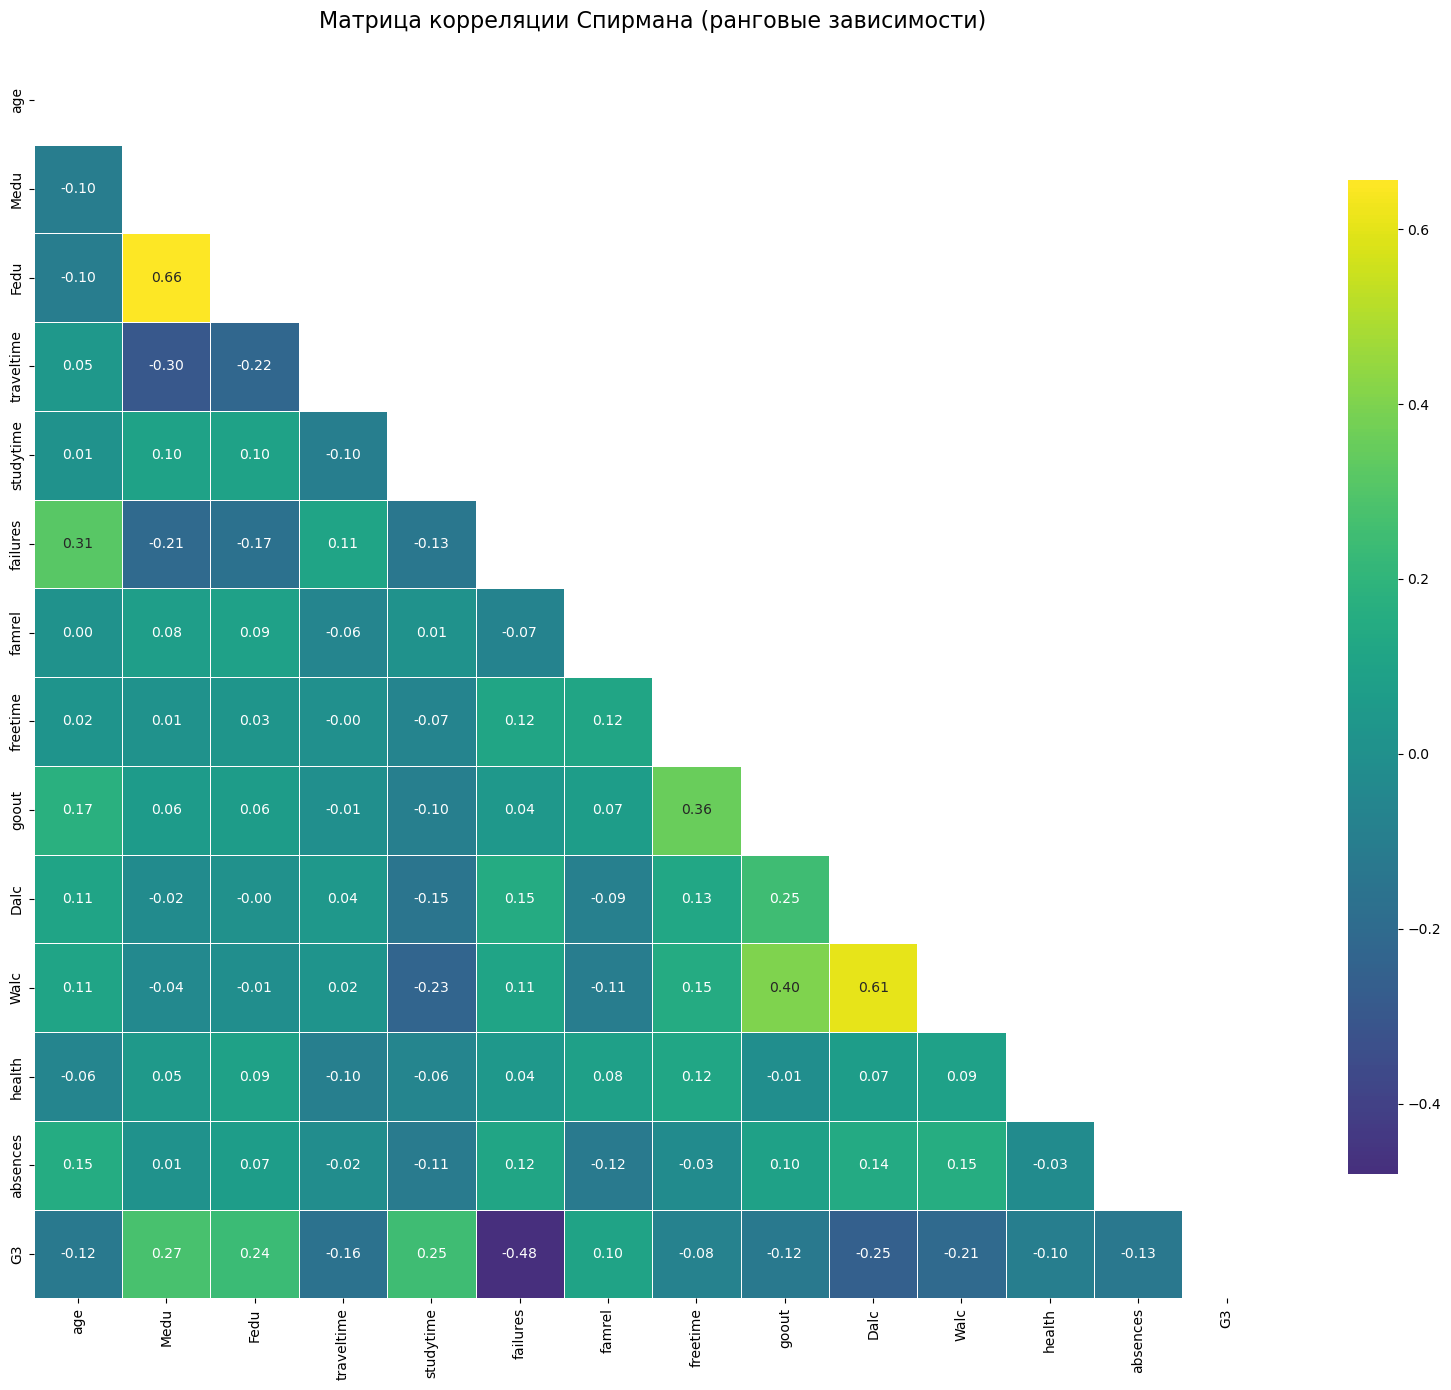

Топ-15 самых сильных корреляций Спирмана:
Medu       Fedu          0.656032
Dalc       Walc          0.606086
failures   G3           -0.480390
goout      Walc          0.400189
freetime   goout         0.358096
age        failures      0.313380
Medu       traveltime   -0.300522
           G3            0.271893
Dalc       G3           -0.254814
goout      Dalc          0.251970
studytime  G3            0.249167
Fedu       G3            0.238567
studytime  Walc         -0.231045
Fedu       traveltime   -0.220029
Medu       failures     -0.208516
dtype: float64


In [16]:
# Матрица корреляции Спирмана
plt.figure(figsize=(16, 14))
spearman_corr = numeric_data_clean.corr(method='spearman')

# Создаем маску для верхнего треугольника
mask = np.triu(np.ones_like(spearman_corr, dtype=bool))
spearman_corr*=~mask
# Тепловая карта корреляции Спирмана
sns.heatmap(spearman_corr, mask=mask, annot=True, cmap='viridis', center=0,
            fmt='.2f', linewidths=0.5, cbar_kws={'shrink': 0.8})
plt.title('Матрица корреляции Спирмана (ранговые зависимости)', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

# Выведем наиболее сильно коррелирующие пары признаков
print("Топ-15 самых сильных корреляций Спирмана:")
spearman_corr_unstacked = spearman_corr.unstack()
spearman_corr_sorted = spearman_corr_unstacked.sort_values(key=abs, ascending=False)
# Убираем корреляции с самими собой
spearman_corr_sorted = spearman_corr_sorted[spearman_corr_sorted != 1.0]
print(spearman_corr_sorted.head(15))

## Диапазон значений характеристик

Посчитайте число уникальных значений для каждого признака и сравните их между собой.

In [17]:
print("АНАЛИЗ ДИАПАЗОНОВ ЗНАЧЕНИЙ ХАРАКТЕРИСТИК")
print("=" * 60)

feature_analysis = []

for column in X_train.columns:
    unique_count = X_train[column].nunique()
    null_count = X_train[column].isnull().sum()
    null_percent = (null_count / len(X_train)) * 100
    dtype = X_train[column].dtype
    
    # Для числовых признаков
    if np.issubdtype(dtype, np.number):
        min_val = X_train[column].min()
        max_val = X_train[column].max()
        value_range = f"{min_val} - {max_val}"
        feature_type = "Числовой"
    else:
        value_range = ", ".join([str(x) for x in X_train[column].unique()[:3]])
        if len(X_train[column].unique()) > 3:
            value_range += "..."
        feature_type = "Категориальный"
    
    feature_analysis.append({
        'Признак': column,
        'Тип': feature_type,
        'Уникальных значений': unique_count,
        'Пропуски': null_count,
        'Пропуски %': round(null_percent, 2),
        'Диапазон/Значения': value_range
    })

analysis_df = pd.DataFrame(feature_analysis)
analysis_df = analysis_df.sort_values('Уникальных значений', ascending=False)

pd.set_option('display.max_rows', None)
pd.set_option('display.width', 1000)
print("\nПОЛНЫЙ АНАЛИЗ ДИАПАЗОНОВ ЗНАЧЕНИЙ:")
print(analysis_df.to_string(index=False))

АНАЛИЗ ДИАПАЗОНОВ ЗНАЧЕНИЙ ХАРАКТЕРИСТИК

ПОЛНЫЙ АНАЛИЗ ДИАПАЗОНОВ ЗНАЧЕНИЙ:
   Признак            Тип  Уникальных значений  Пропуски  Пропуски %           Диапазон/Значения
  absences       Числовой                   22         0        0.00                      0 - 32
        G3       Числовой                   17         0        0.00                      0 - 19
       age       Числовой                   16        28        6.17                -1.0 - 181.0
       sex Категориальный                    6         0        0.00                  M, F, D...
      Fjob Категориальный                    5         0        0.00 services, other, at_home...
      Mjob Категориальный                    5         0        0.00  at_home, teacher, other...
      Medu       Числовой                    5         0        0.00                       0 - 4
      Dalc       Числовой                    5         0        0.00                       1 - 5
     goout       Числовой                    5    

## Найдите соотношение мужского и женского пола для самых выскоих оценок (G3) из датасета, у которых время на дорогу больше, чем 30 минут. Нарисуйте это соотношение на круговой диаграмме

In [18]:

print("АНАЛИЗ СООТНОШЕНИЯ ПОЛОВ ДЛЯ СТУДЕНТОВ С ВЫСОКИМИ ОЦЕНКАМИ")
print("И ВРЕМЕНЕМ НА ДОРОГУ > 30 МИНУТ")
print("=" * 60)

print("Распределение оценок G3:")
print(X_train['G3'].describe())

# Определим порог для "самых высоких оценок"
# Возьмем верхние 25% оценок как "высокие"
high_grade_threshold = X_train['G3'].quantile(0.75)
print(f"\nПорог для высоких оценок (верхние 25%): {high_grade_threshold}")

filtered_data = X_train[
    (X_train['G3'] >= high_grade_threshold) & 
    (X_train['traveltime'] >= 3)
]

print(f"\nВсего студентов с высокими оценками и временем на дорогу > 30 мин: {len(filtered_data)}")
print(f"Это {len(filtered_data)/len(X_train)*100:.1f}% от общего числа студентов")

if not filtered_data.empty:
    sex_distribution = filtered_data['sex'].value_counts()
    print(f"\nРаспределение по полу:")
    for sex, count in sex_distribution.items():
        percentage = count / len(filtered_data) * 100
        print(f"  {sex}: {count} студентов ({percentage:.1f}%)")

АНАЛИЗ СООТНОШЕНИЯ ПОЛОВ ДЛЯ СТУДЕНТОВ С ВЫСОКИМИ ОЦЕНКАМИ
И ВРЕМЕНЕМ НА ДОРОГУ > 30 МИНУТ
Распределение оценок G3:
count    454.000000
mean      11.825991
std        3.185665
min        0.000000
25%       10.000000
50%       12.000000
75%       14.000000
max       19.000000
Name: G3, dtype: float64

Порог для высоких оценок (верхние 25%): 14.0

Всего студентов с высокими оценками и временем на дорогу > 30 мин: 11
Это 2.4% от общего числа студентов

Распределение по полу:
  F: 7 студентов (63.6%)
  M: 4 студентов (36.4%)


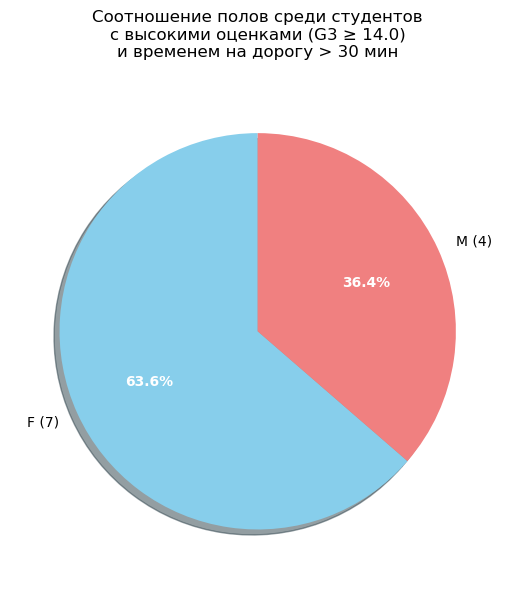

In [19]:
plt.figure(figsize=(12, 6))

colors = ['skyblue', 'lightcoral']
labels = [f'{sex} ({count})' for sex, count in sex_distribution.items()]

wedges, texts, autotexts = plt.pie(
    sex_distribution.values, 
    labels=labels,
    autopct='%1.1f%%',
    colors=colors[:len(sex_distribution)],
    startangle=90,
    shadow=True
)

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

plt.title(f'Соотношение полов среди студентов\nс высокими оценками (G3 ≥ {high_grade_threshold})\nи временем на дорогу > 30 мин', 
            fontsize=12, pad=20)

plt.tight_layout()
plt.show()

## Построить boxplot для оценок по возрасту.  

Text(0, 0.5, 'G3')

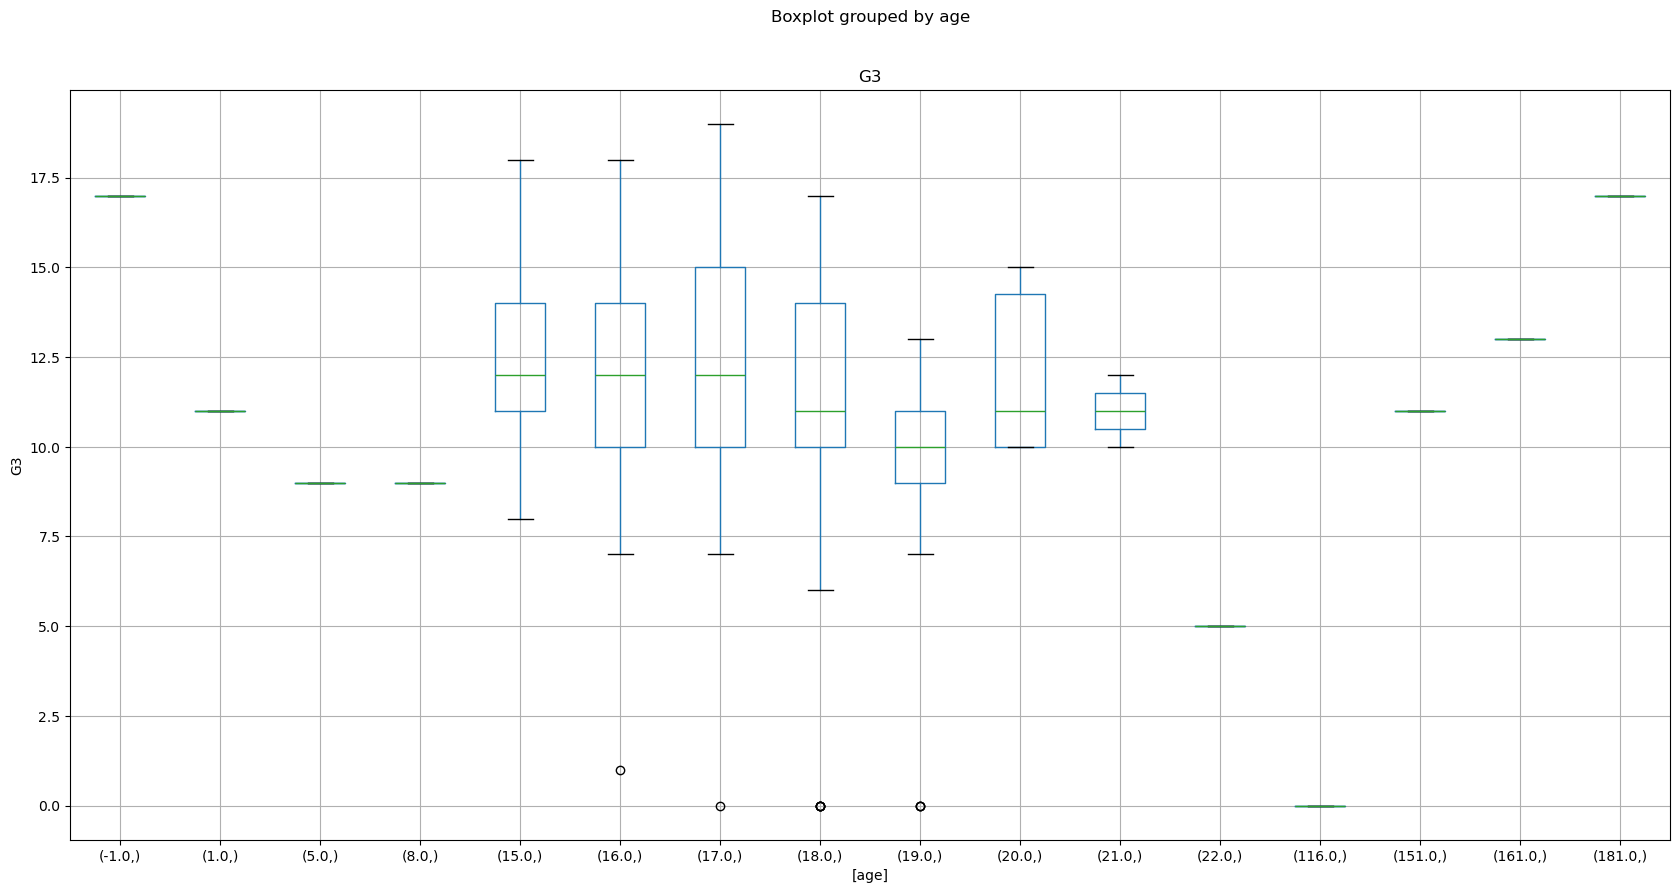

In [20]:
fig, ax = plt.subplots(figsize=(20, 10))
X_train.dropna(axis=0).boxplot(ax=ax, column=["G3"], by=["age"])
ax.set_ylabel("G3")

## Найти id топ-5 самых юных отличников.

In [21]:
X_train[X_train["G3"] >= 14].sort_values(["age"], ascending=True).head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
249,GP,M,-1.0,R,GT3,T,4,3,teacher,services,...,yes,yes,5,3,2,1,2,4,4,17
10,MS,M,15.0,NaN,LE3,T,4,1,health,services,...,yes,no,5,3,4,1,2,2,0,14
109,GP,M,15.0,U,LE3,T,4,2,teacher,other,...,yes,no,3,5,2,1,1,3,10,18
112,GP,M,15.0,U,GT3,T,4,4,teacher,health,...,no,no,3,2,2,1,1,5,8,16
200,GP,F,15.0,U,GT3,T,4,4,services,at_home,...,yes,yes,4,3,3,1,1,5,4,15


## Для каждого возраста найдите максимальную и минимальную оценку (G3)

In [22]:

print("МАКСИМАЛЬНЫЕ И МИНИМАЛЬНЫЕ ОЦЕНКИ ПО ВОЗРАСТАМ")
print("=" * 60)

age_data = X_train.dropna(subset=['age']).copy()

age_extremes = age_data.groupby('age')['G3'].agg([
    ('min_score', 'min'),
    ('max_score', 'max'),
    ('count', 'count'),
    ('mean', 'mean'),
    ('range', lambda x: x.max() - x.min())
]).round(2)

print("Экстремальные значения оценок по возрастам:")
print(age_extremes)

МАКСИМАЛЬНЫЕ И МИНИМАЛЬНЫЕ ОЦЕНКИ ПО ВОЗРАСТАМ
Экстремальные значения оценок по возрастам:
        min_score  max_score  count   mean  range
age                                              
-1.0           17         17      1  17.00      0
 1.0           11         11      1  11.00      0
 5.0            9          9      1   9.00      0
 8.0            9          9      1   9.00      0
 15.0           8         18     73  12.29     10
 16.0           1         18    111  12.07     17
 17.0           0         19    111  12.31     19
 18.0           0         17     95  11.33     17
 19.0           0         13     19   8.63     13
 20.0          10         15      6  12.00      5
 21.0          10         12      2  11.00      2
 22.0           5          5      1   5.00      0
 116.0          0          0      1   0.00      0
 151.0         11         11      1  11.00      0
 161.0         13         13      1  13.00      0
 181.0         17         17      1  17.00      0


# Часть 2. Предобработка данных

Теперь перейдем к подготовке данных для моделей машинного обучения. Не все из описанного ниже нужно делать. Подумайте.

In [23]:
valid_ranges = {
    'school': ['GP', 'MS'],
    'sex': ['F', 'M'],
    'age': lambda x: 15 <= x <= 22,
    'address': ['U', 'R'],
    'famsize': ['LE3', 'GT3'],
    'Pstatus': ['T', 'A'],
    'Medu': [0, 1, 2, 3, 4],
    'Fedu': [0, 1, 2, 3, 4],
    'Mjob': ['teacher', 'health', 'services', 'at_home', 'other'],
    'Fjob': ['teacher', 'health', 'services', 'at_home', 'other'],
    'reason': ['home', 'reputation', 'course', 'other'],
    'guardian': ['mother', 'father', 'other'],
    'traveltime': [1, 2, 3, 4],
    'studytime': [1, 2, 3, 4],
    'failures': lambda x: 0 <= x <= 4,
    'schoolsup': ['yes', 'no'],
    'famsup': ['yes', 'no'],
    'paid': ['yes', 'no'],
    'activities': ['yes', 'no'],
    'nursery': ['yes', 'no'],
    'higher': ['yes', 'no'],
    'internet': ['yes', 'no'],
    'romantic': ['yes', 'no'],
    'famrel': [1, 2, 3, 4, 5],
    'freetime': [1, 2, 3, 4, 5],
    'goout': [1, 2, 3, 4, 5],
    'Dalc': [1, 2, 3, 4, 5],
    'Walc': [1, 2, 3, 4, 5],
    'health': [1, 2, 3, 4, 5],
    'absences': lambda x: 0 <= x <= 93
}

## Найдите и исправьте ошибки в данных

In [24]:
def validate_and_clean_data(df, valid_ranges):
    """
    Проверяет данные на соответствие валидным диапазонам и заменяет невалидные значения на NaN
    """
    cleaned_df = df.copy()
    validation_report = {}
    
    print("ПРОВЕРКА ДАННЫХ ПО ВАЛИДНЫМ ДИАПАЗОНАМ")
    print("=" * 60)
    
    for column, valid_range in valid_ranges.items():
        if column not in cleaned_df.columns:
            print(f"Столбец '{column}' отсутствует в данных")
            continue
            
        original_count = len(cleaned_df)
        invalid_mask = pd.Series([False] * len(cleaned_df))
        
        if callable(valid_range):
            invalid_mask = ~cleaned_df[column].apply(
                lambda x: valid_range(x) if pd.notna(x) else True
            )
        else:
            invalid_mask = ~cleaned_df[column].isin(valid_range) & cleaned_df[column].notna()
        
        invalid_count = invalid_mask.sum()
        
        if invalid_count > 0:
            print(f"{column}: найдено {invalid_count} невалидных значений")
            print(f"   Невалидные значения: {cleaned_df[column][invalid_mask].unique()}")
            
            cleaned_df.loc[invalid_mask, column] = np.nan
            
            validation_report[column] = {
                'invalid_count': invalid_count,
                'invalid_percentage': (invalid_count / original_count) * 100,
                'invalid_values': cleaned_df[column][invalid_mask].unique().tolist() if invalid_count > 0 else []
            }
        else:
            validation_report[column] = {
                'invalid_count': 0,
                'invalid_percentage': 0,
                'invalid_values': []
            }
    
    return cleaned_df, validation_report

X_train_cleaned, validation_report = validate_and_clean_data(X_train, valid_ranges)

ПРОВЕРКА ДАННЫХ ПО ВАЛИДНЫМ ДИАПАЗОНАМ
sex: найдено 8 невалидных значений
   Невалидные значения: ['D' 'C' 'B' 'A']
age: найдено 8 невалидных значений
   Невалидные значения: [161. 181. 151. 116.  -1.   1.   5.   8.]


## Удалите скоррелированные данные

В данных не обнаруженно данных, которые необходимо удалить из-за мультиколлинеарности.

## Заполните пропуски в данных

Заполнить пропуски в данных можно одним из следующи способов или разными для разных признаков:
- Заполнить нулями
- Выбросить данные с нулями (не рекомендуется)
- Заполнить средним для данного параметра
- Заполнить наиболее соответствующим данному прецеденту (рекомендуется)

In [25]:
print("ЗАПОЛНЕНИЕ ПРОПУСКОВ В ДАННЫХ")
print("=" * 60)

df_filled = X_train_cleaned.copy()

print("АНАЛИЗ ПРОПУСКОВ ПЕРЕД ЗАПОЛНЕНИЕМ:")
missing_before = df_filled.isnull().sum()
missing_before_pct = (missing_before / len(df_filled)) * 100

missing_summary = pd.DataFrame({
    'Пропуски': missing_before,
    'Процент': missing_before_pct
}).sort_values('Пропуски', ascending=False)

columns_with_missing = missing_summary[missing_summary['Пропуски'] > 0]
print(f"Столбцы с пропусками: {len(columns_with_missing)}")
print(columns_with_missing.to_string())

ЗАПОЛНЕНИЕ ПРОПУСКОВ В ДАННЫХ
АНАЛИЗ ПРОПУСКОВ ПЕРЕД ЗАПОЛНЕНИЕМ:
Столбцы с пропусками: 3
         Пропуски   Процент
age            36  7.929515
sex             8  1.762115
address         5  1.101322


In [26]:
print("\n" + "="*30)
print("1. ЗАПОЛНЕНИЕ ПОЛА (SEX)")
print("="*30)

missing_before = df_filled['sex'].isnull().sum()

mode_sex = df_filled['sex'].mode()
if len(mode_sex) > 0:
    fill_value = mode_sex[0]
    df_filled['sex'] = df_filled['sex'].fillna(fill_value)
    missing_after = df_filled['sex'].isnull().sum()
    print(f"Заполнено {missing_before - missing_after} пропусков в поле")
    print(f"   Использовано значение: '{fill_value}'")
else:
    print("Не удалось найти моду для заполнения пола")


1. ЗАПОЛНЕНИЕ ПОЛА (SEX)
Заполнено 8 пропусков в поле
   Использовано значение: 'F'


In [27]:
print("\n" + "="*30)
print("2. ЗАПОЛНЕНИЕ ВОЗРАСТА (AGE)")
print("="*30)

missing_before = df_filled['age'].isnull().sum()

filled_count = 0

# Находим студентов с пропущенным возрастом
students_missing_age = df_filled[df_filled['age'].isnull()]

for idx in students_missing_age.index:
    student_sex = df_filled.loc[idx, 'sex']
    
    # Находим медианный возраст для студентов с таким же полом
    similar_age = df_filled[
        (df_filled['sex'] == student_sex) & 
        (df_filled['age'].notna())
    ]['age'].median()
    
    if pd.notna(similar_age):
        df_filled.loc[idx, 'age'] = similar_age
        filled_count += 1

# Заполняем оставшиеся пропуски общей медианой
remaining_missing = df_filled['age'].isnull().sum()
if remaining_missing > 0:
    overall_median = df_filled['age'].median()
    df_filled['age'] = df_filled['age'].fillna(overall_median)
    filled_count += remaining_missing

missing_after = df_filled['age'].isnull().sum()
print(f"Заполнено {filled_count} пропусков в возрасте")
print(f"   Стратегия: медиана по полу → общая медиана")


2. ЗАПОЛНЕНИЕ ВОЗРАСТА (AGE)
Заполнено 36 пропусков в возрасте
   Стратегия: медиана по полу → общая медиана


In [28]:
print("\n" + "="*30)
print("3. ЗАПОЛНЕНИЕ АДРЕСА (ADDRESS)")
print("="*30)

missing_before = df_filled['address'].isnull().sum()

mode_address = df_filled['address'].mode()
if len(mode_address) > 0:
    fill_value = mode_address[0]
    df_filled['address'] = df_filled['address'].fillna(fill_value)
    missing_after = df_filled['address'].isnull().sum()
    print(f"Заполнено {missing_before - missing_after} пропусков в адресе")
    print(f"   Использовано значение: '{fill_value}'")
else:
    print("Не удалось найти моду для заполнения адреса")



3. ЗАПОЛНЕНИЕ АДРЕСА (ADDRESS)
Заполнено 5 пропусков в адресе
   Использовано значение: 'U'


## Закодируйте категориальные признаки

In [29]:
# Простое кодирование категориальных признаков
print("ПРОСТОЕ КОДИРОВАНИЕ КАТЕГОРИАЛЬНЫХ ПРИЗНАКОВ")
print("=" * 50)

df_encoded = df_filled.copy()

categorical_columns = df_encoded.select_dtypes(include=['object']).columns
print(f"Категориальные признаки: {list(categorical_columns)}")

ПРОСТОЕ КОДИРОВАНИЕ КАТЕГОРИАЛЬНЫХ ПРИЗНАКОВ
Категориальные признаки: ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']


In [30]:
print("\n" + "="*30)
print("1. КОДИРОВАНИЕ БИНАРНЫХ ПРИЗНАКОВ")
print("="*30)

# Бинарные признаки (только 2 значения)
binary_mappings = {}

for col in categorical_columns:
    unique_values = sorted(df_encoded[col].unique())
    if len(unique_values) == 2:
        # Создаем простое mapping: 0 и 1
        mapping = {unique_values[0]: 0, unique_values[1]: 1}
        df_encoded[col] = df_encoded[col].map(mapping)
        binary_mappings[col] = mapping
        print(f" {col}: {mapping}")

print(f"Закодировано бинарных признаков: {len(binary_mappings)}")


1. КОДИРОВАНИЕ БИНАРНЫХ ПРИЗНАКОВ
 school: {'GP': 0, 'MS': 1}
 sex: {'F': 0, 'M': 1}
 address: {'R': 0, 'U': 1}
 famsize: {'GT3': 0, 'LE3': 1}
 Pstatus: {'A': 0, 'T': 1}
 schoolsup: {'no': 0, 'yes': 1}
 famsup: {'no': 0, 'yes': 1}
 paid: {'no': 0, 'yes': 1}
 activities: {'no': 0, 'yes': 1}
 nursery: {'no': 0, 'yes': 1}
 higher: {'no': 0, 'yes': 1}
 internet: {'no': 0, 'yes': 1}
 romantic: {'no': 0, 'yes': 1}
Закодировано бинарных признаков: 13


In [31]:
print("\n" + "="*40)
print("2. КОДИРОВАНИЕ ОСТАЛЬНЫХ КАТЕГОРИАЛЬНЫХ ПРИЗНАКОВ")
print("="*40)

from sklearn.preprocessing import LabelEncoder

# Для признаков с более чем 2 значениями используем LabelEncoder
label_encoders = {}
other_categorical = [col for col in categorical_columns if col not in binary_mappings]

for col in other_categorical:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
    label_encoders[col] = le
    print(f" {col}: {len(le.classes_)} категорий → закодировано")

print(f"Закодировано других признаков: {len(other_categorical)}")


2. КОДИРОВАНИЕ ОСТАЛЬНЫХ КАТЕГОРИАЛЬНЫХ ПРИЗНАКОВ
 Mjob: 5 категорий → закодировано
 Fjob: 5 категорий → закодировано
 reason: 4 категорий → закодировано
 guardian: 3 категорий → закодировано
Закодировано других признаков: 4


In [32]:
print("\n" + "="*40)
print("MAPPING ДЛЯ ОБРАТНОГО ПРЕОБРАЗОВАНИЯ")
print("="*40)

print("Бинарные признаки:")
for col, mapping in binary_mappings.items():
    print(f"  {col}: {mapping}")

print("\nДругие категориальные признаки:")
for col, encoder in label_encoders.items():
    print(f"  {col}: {list(encoder.classes_)} → {list(range(len(encoder.classes_)))}")


MAPPING ДЛЯ ОБРАТНОГО ПРЕОБРАЗОВАНИЯ
Бинарные признаки:
  school: {'GP': 0, 'MS': 1}
  sex: {'F': 0, 'M': 1}
  address: {'R': 0, 'U': 1}
  famsize: {'GT3': 0, 'LE3': 1}
  Pstatus: {'A': 0, 'T': 1}
  schoolsup: {'no': 0, 'yes': 1}
  famsup: {'no': 0, 'yes': 1}
  paid: {'no': 0, 'yes': 1}
  activities: {'no': 0, 'yes': 1}
  nursery: {'no': 0, 'yes': 1}
  higher: {'no': 0, 'yes': 1}
  internet: {'no': 0, 'yes': 1}
  romantic: {'no': 0, 'yes': 1}

Другие категориальные признаки:
  Mjob: ['at_home', 'health', 'other', 'services', 'teacher'] → [0, 1, 2, 3, 4]
  Fjob: ['at_home', 'health', 'other', 'services', 'teacher'] → [0, 1, 2, 3, 4]
  reason: ['course', 'home', 'other', 'reputation'] → [0, 1, 2, 3]
  guardian: ['father', 'mother', 'other'] → [0, 1, 2]


## Придумайте сложные признаки

Сложные признаки - это комбинации существующих (линейных или нелинейных).
Это нужно для того, чтобы самостоятельно добавить нелинейность в алгоритм.

Приведите не менее двух признаков.

In [33]:
print("=" * 30)
print("СОЗДАНИЕ СЛОЖНЫХ ПРИЗНАКОВ")
print("=" * 30)

df_with_features = df_encoded.copy()

print(f"Исходное количество признаков: {len(df_with_features.columns)}")
print(f"Исходные признаки: {list(df_with_features.columns)}")

СОЗДАНИЕ СЛОЖНЫХ ПРИЗНАКОВ
Исходное количество признаков: 31
Исходные признаки: ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G3']


In [34]:
print("\n" + "="*30)
print("БАЛАНС УЧЕБЫ И ОТДЫХА")
print("="*30)

if all(col in df_with_features.columns for col in ['studytime', 'freetime', 'goout']):
    df_with_features['study_life_balance'] = (
        df_with_features['studytime'] - 
        (df_with_features['freetime'] + df_with_features['goout']) / 2
    )
    print("Создан признак 'study_life_balance'")
    print(f"   Диапазон значений: {df_with_features['study_life_balance'].min():.2f} - {df_with_features['study_life_balance'].max():.2f}")
else:
    print("Не хватает признаков для создания study_life_balance")

print("\n" + "="*30)
print("СОВОКУПНЫЙ ПОКАЗАТЕЛЬ АЛКОГОЛЯ")
print("="*30)

if all(col in df_with_features.columns for col in ['Dalc', 'Walc']):
    # Создаем совокупный показатель потребления алкоголя
    df_with_features['total_alcohol_index'] = (
        df_with_features['Dalc'] * 5 +
        df_with_features['Walc'] * 2
    )
    print("Создан признак 'total_alcohol_index'")
    print(f"   Диапазон значений: {df_with_features['total_alcohol_index'].min():.2f} - {df_with_features['total_alcohol_index'].max():.2f}")
else:
    print("Не хватает признаков для создания total_alcohol_index")


БАЛАНС УЧЕБЫ И ОТДЫХА
Создан признак 'study_life_balance'
   Диапазон значений: -4.00 - 2.50

СОВОКУПНЫЙ ПОКАЗАТЕЛЬ АЛКОГОЛЯ
Создан признак 'total_alcohol_index'
   Диапазон значений: 7.00 - 35.00


# Часть 3. Стратегия валидации

Итак, у вас есть данные для обучения и данные, на которых необходимо сделать предсказание. Для оценки точности необходимо проводить валидацию (так как мало данных, можно проводить кросс валидацию).
Валидацию проще всего реализовать методами sklearn, например:
- KFold
- ShuffleSplit
- StratifiedKFold
- StratifiedShuffleSplit
- GroupKFold
- GroupShuffleSplit

In [35]:
from sklearn.model_selection import (KFold, ShuffleSplit, StratifiedKFold, 
                                   StratifiedShuffleSplit, GroupKFold, GroupShuffleSplit,
                                   cross_val_score, train_test_split)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

СТРАТЕГИЯ ВАЛИДАЦИИ
Размер данных: (454, 33)
Целевая переменная: G3

Распределение целевой переменной G3:
count    454.000000
mean      11.825991
std        3.185665
min        0.000000
25%       10.000000
50%       12.000000
75%       14.000000
max       19.000000
Name: G3, dtype: float64


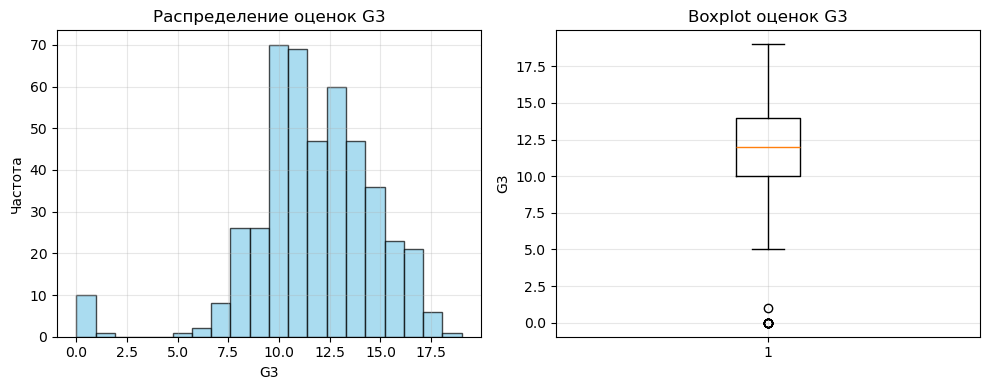

In [36]:
print("СТРАТЕГИЯ ВАЛИДАЦИИ")
print("=" * 40)

# Используем данные с созданными признаками
df = df_with_features.copy()

# Проверим размер данных и распределение целевой переменной
print(f"Размер данных: {df.shape}")
print(f"Целевая переменная: G3")

X = df.drop('G3', axis=1)
y = df['G3']

print(f"\nРаспределение целевой переменной G3:")
print(y.describe())

# Визуализация распределения G3
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.hist(y, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Распределение оценок G3')
plt.xlabel('G3')
plt.ylabel('Частота')
plt.grid(alpha=0.3)

plt.subplot(1, 2, 2)
plt.boxplot(y)
plt.title('Boxplot оценок G3')
plt.ylabel('G3')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()


In [37]:
print("="*50)
print("   АНАЛИЗ ДАННЫХ ДЛЯ ВЫБОРА СТРАТЕГИИ ВАЛИДАЦИИ")
print("="*50)

print("1. РАЗМЕР ДАННЫХ:")
print(f"    Количество samples: {len(X)}")
print(f"    Количество features: {len(X.columns)}")

print(f"\n3. ВЫВОДЫ ДЛЯ ВЫБОРА СТРАТЕГИИ:")
print(f"    Маленький датасет ({len(X)} samples) → нужна кросс-валидация")
print(f"    Регрессионная задача (G3) → Stratified не обязателен")
print(f"    Естественные группы (школа, возраст) → можно использовать GroupKFold")

   АНАЛИЗ ДАННЫХ ДЛЯ ВЫБОРА СТРАТЕГИИ ВАЛИДАЦИИ
1. РАЗМЕР ДАННЫХ:
    Количество samples: 454
    Количество features: 32

3. ВЫВОДЫ ДЛЯ ВЫБОРА СТРАТЕГИИ:
    Маленький датасет (454 samples) → нужна кросс-валидация
    Регрессионная задача (G3) → Stratified не обязателен
    Естественные группы (школа, возраст) → можно использовать GroupKFold


## Разделите данные и объясните выбор стратегии

In [38]:
fold_groups = GroupKFold(n_splits=2)
fold = StratifiedKFold(n_splits=2)

grouped_fold = list(fold_groups.split(X=X, y=y, groups=df["school"]))
ungrouped_fold = list(fold.split(X=X, y=y))

c:\Users\ilyar\anaconda3\envs\my-rdkit-env\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


__Ваш ответ:__  Сравниваем два метода валидации модели для прогнозирования оценок: GroupKFold и StratifiedKFold. GroupKFold важен для проверки способности модели работать с данными из новых школ, так как наши студенты принадлежат к двум разным учебным заведениям. StratifiedKFold, в свою очередь, обеспечивает стабильную оценку на несбалансированных данных благодаря случайному разделению. Это сравнение покажет, насколько хорошо модель адаптируется к новым условиям (школам) против ее общей надежности.

# Часть 4. Заполнение пропусков в данных

## Фильтрация по диапазону значений

Проверьте, что все характеристики принадлежат тому диапазону значений, который приведен в описании к исходным данным. Например, если в графе "Пол" есть значение FF, P или -1, то это явная ошибка заполнения.

Приведите данные в соответствии с описанием данных. Если значение указано неверно - укажите ```NaN```.

In [39]:
# СДелано выше

## Адаптивное заполнения пропусков

Реализуйте стратегию заполнения пропусков данных на основе схожих примеров. Обучите один из известных вам алгоритмов (knn, Naive Bayes, linear regression) для предсказания той характеристики, пропуски которой присутсвуют в данных. В качестве характеристики для обучения алгоритмов __нельзя__ использовать ```G3```.

In [40]:
# Нет пропусков

# Часть 5. Обучение алгоритма

Целевая переменная принимает дискретные значения [0; 20], поэтому вы можете поставить как задачу классификации, так и задачу регрессии.

!Не забудьте про оптимизацию параметров алгоритмов, у вас же уже есть данные для валидации.

In [41]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

 # Функции для подсчета метрик и визуализации результата различных обучений
def get_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    return {'mse': mse, 'rmse': np.sqrt(mse), 'mae': mean_absolute_error(y_true, y_pred), 'r2': r2_score(y_true, y_pred)}

def visualize(true_values, predicted, label=""):
    plt.figure(figsize=(18, 8))
    plt.plot(np.arange(len(predicted)), predicted, '^-', label=label)
    plt.plot(np.arange(len(predicted)), true_values, '.-', label="True values")
    plt.title(label)
    plt.legend()
    plt.grid(True)

## KNN

{'mse': 14.963855421686747, 'rmse': np.float64(3.8683142868291798), 'mae': 2.9216867469879517, 'r2': -0.13661021434241882}
None
{'mse': 7.195682819383261, 'rmse': np.float64(2.682476993262619), 'mae': 1.998237885462555, 'r2': 0.28430678659666453}


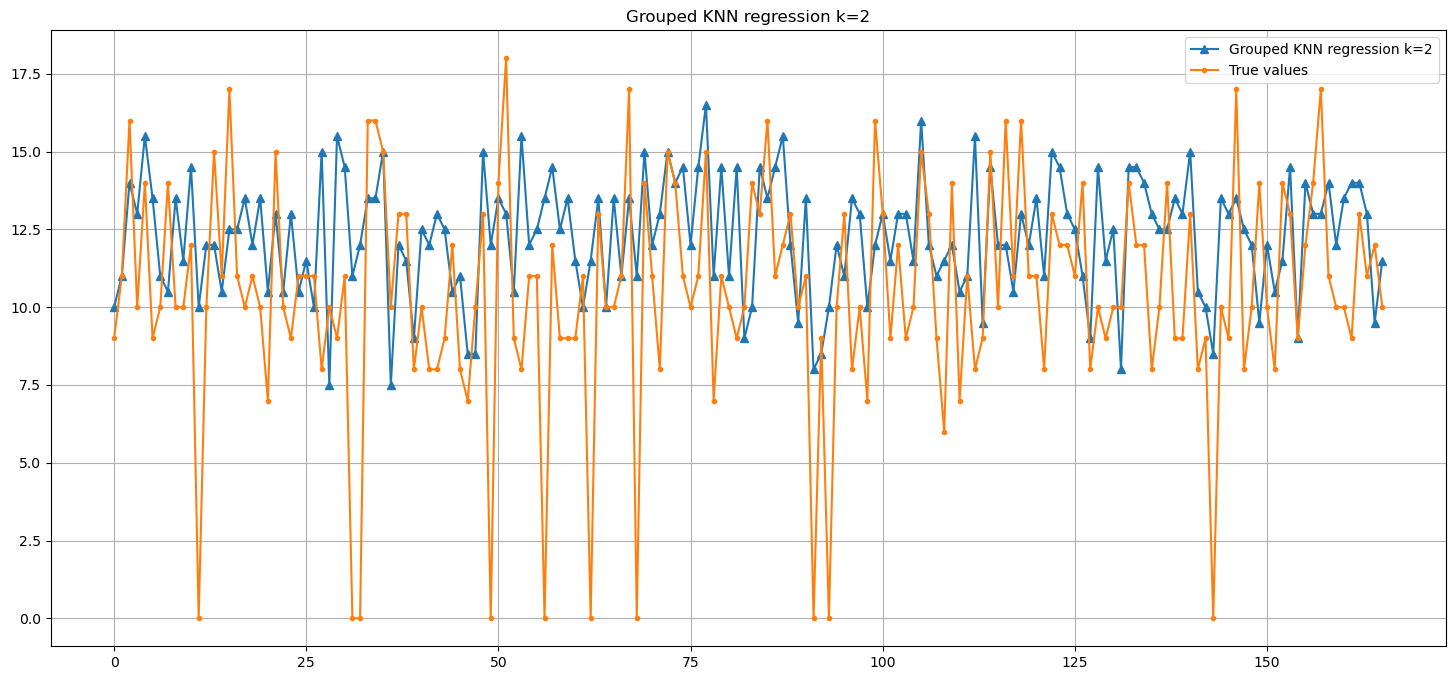

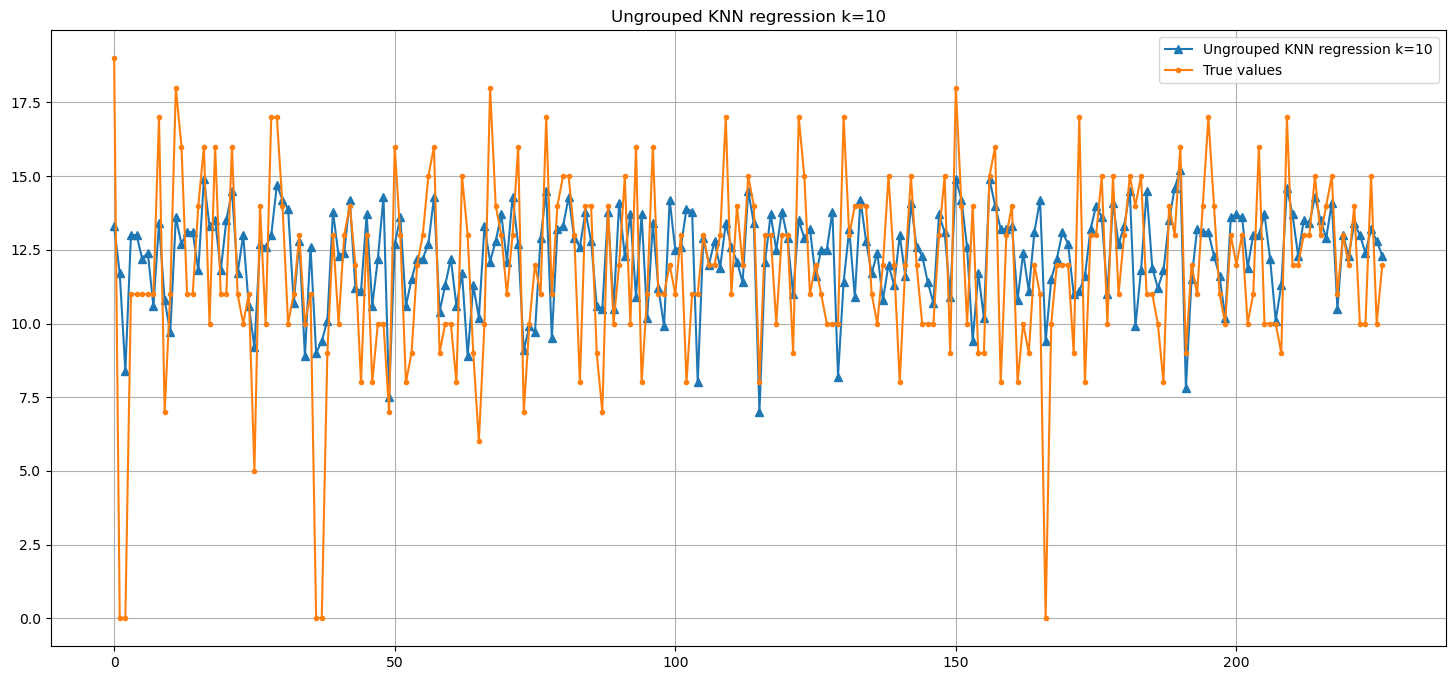

In [42]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

def run_knn(folded, k=10):
    pipeline = Pipeline([('scaler', StandardScaler()), ('model', KNeighborsRegressor(n_neighbors=k))])
    pipeline.fit(X.iloc[folded[1][0]], y.iloc[folded[1][0]])
    predicted = pipeline.predict(X.iloc[folded[1][1]])
    true_values = y.iloc[folded[1][1]]
    metrics = get_metrics(true_values, predicted)
    return pipeline, predicted, true_values, metrics

best_r2 = ({"r2": -100}, None)
for k in range(2, 30):
    pipeline, predicted, true_values, metrics = run_knn(grouped_fold, k=k)
    if metrics["r2"] > best_r2[0]["r2"]:
        best_r2 = (metrics, (predicted, true_values, k))
print(best_r2[0])
print(visualize(best_r2[1][1], best_r2[1][0], f"Grouped KNN regression k={best_r2[1][2]}"))
predicted_knn = [best_r2[1][0]]
knn_metric_params = [(best_r2[0]["r2"], pipeline)]

best_r2 = ({"r2": -100}, None)
for k in range(2, 30):
    pipeline, predicted, true_values, metrics = run_knn(ungrouped_fold, k=k)
    if metrics["r2"] > best_r2[0]["r2"]:
        best_r2 = (metrics, (predicted, true_values, k))
print(best_r2[0])
visualize(best_r2[1][1], best_r2[1][0], f"Ungrouped KNN regression k={best_r2[1][2]}")
predicted_knn.append(best_r2[1][0])
knn_metric_params.append((best_r2[0]["r2"], pipeline))

## Bayes

{'mse': 14.087129073108226, 'rmse': np.float64(3.7532824398262683), 'mae': 2.6336741897300144, 'r2': -0.07001667311284487}
{'mse': 7.2292834431897335, 'rmse': np.float64(2.688732683475569), 'mae': 1.9988976409650046, 'r2': 0.28096481905473325}


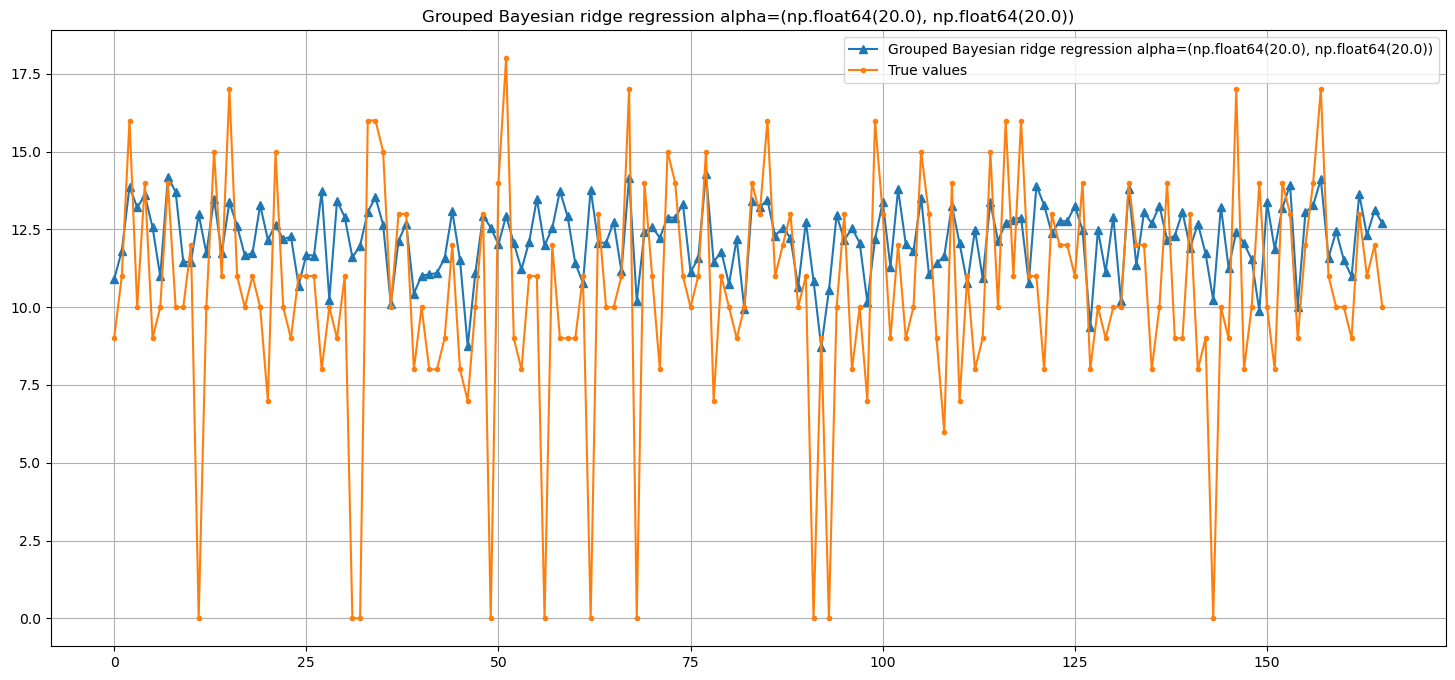

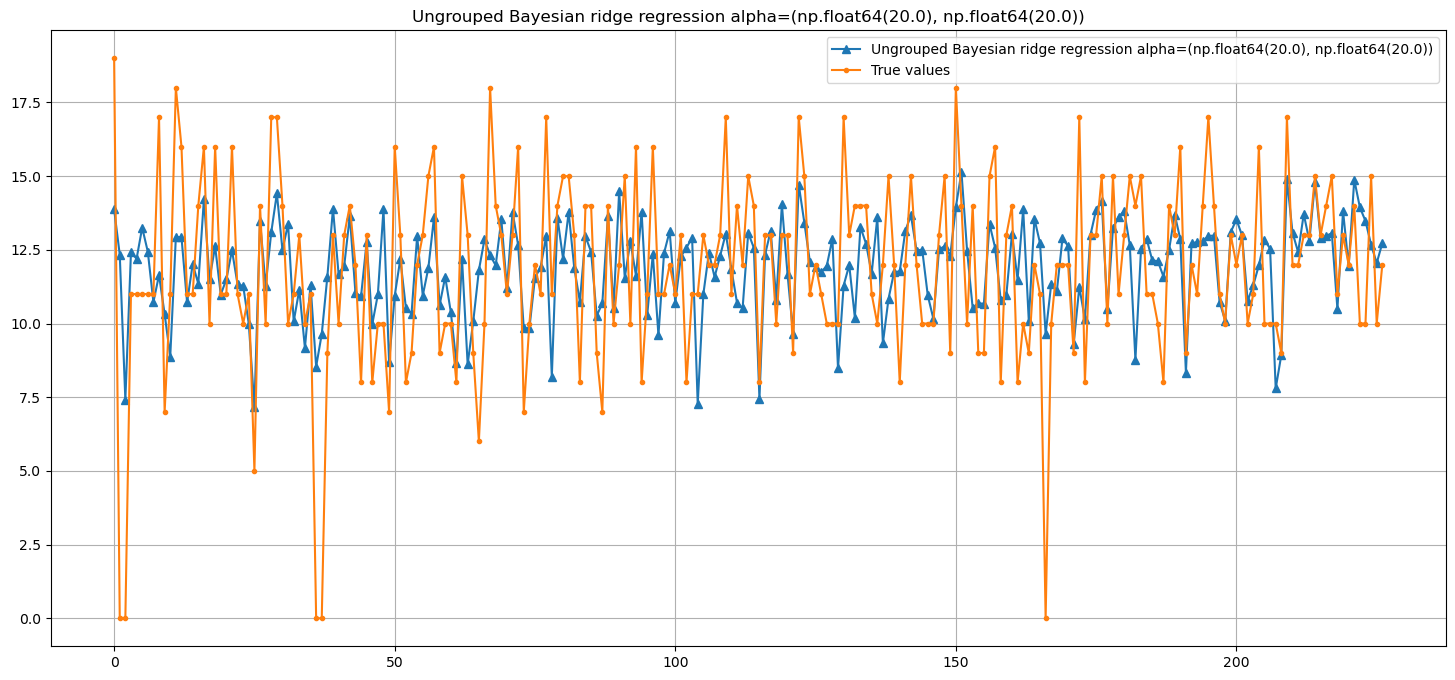

In [43]:
from sklearn.linear_model import BayesianRidge
from sklearn.preprocessing import RobustScaler

def run_bss(folded, alpha_1, alpha_2):
    pipeline = Pipeline([('scaler', RobustScaler()), ('model', BayesianRidge(alpha_1=alpha_1, alpha_2=alpha_2))])
    pipeline.fit(X.iloc[folded[1][0]], y.iloc[folded[1][0]])
    predicted = pipeline.predict(X.iloc[folded[1][1]])
    true_values = y.iloc[folded[1][1]]
    metrics = get_metrics(true_values, predicted)
    return pipeline, predicted, true_values, metrics

best_r2 = ({"r2": -100}, None)
for alpha_1, alpha_2 in zip(np.linspace(0, 20, 120), np.linspace(0, 20, 120)):
    pipeline, predicted, true_values, metrics = run_bss(grouped_fold, alpha_1=alpha_1, alpha_2=alpha_2)
    if metrics["r2"] > best_r2[0]["r2"]:
        best_r2 = (metrics, (predicted, true_values, (alpha_1, alpha_2)))
print(best_r2[0])
visualize(best_r2[1][1], best_r2[1][0], f"Grouped Bayesian ridge regression alpha={best_r2[1][2]}")
predicted_bss = [best_r2[1][0]]
bss_metric_params = [(best_r2[0]["r2"], pipeline)]


best_r2 = ({"r2": -100}, None)
for alpha_1, alpha_2 in zip(np.linspace(0, 20, 120), np.linspace(0, 20, 120)):
    pipeline, predicted, true_values, metrics = run_bss(ungrouped_fold, alpha_1=alpha_1, alpha_2=alpha_2)
    if metrics["r2"] > best_r2[0]["r2"]:
        best_r2 = (metrics, (predicted, true_values, (alpha_1, alpha_2)))
print(best_r2[0])
visualize(best_r2[1][1], best_r2[1][0], f"Ungrouped Bayesian ridge regression alpha={best_r2[1][2]}")
predicted_bss.append(best_r2[1][0])
bss_metric_params.append((best_r2[0]["r2"], pipeline))

## Регрессия

{'mse': 14.073314101080484, 'rmse': np.float64(3.7514416030481517), 'mae': 2.632703899768258, 'r2': -0.06896732868421385}
{'mse': 7.47416535545, 'rmse': np.float64(2.7338919794772436), 'mae': 2.0852380554825585, 'r2': 0.25660850331805307}


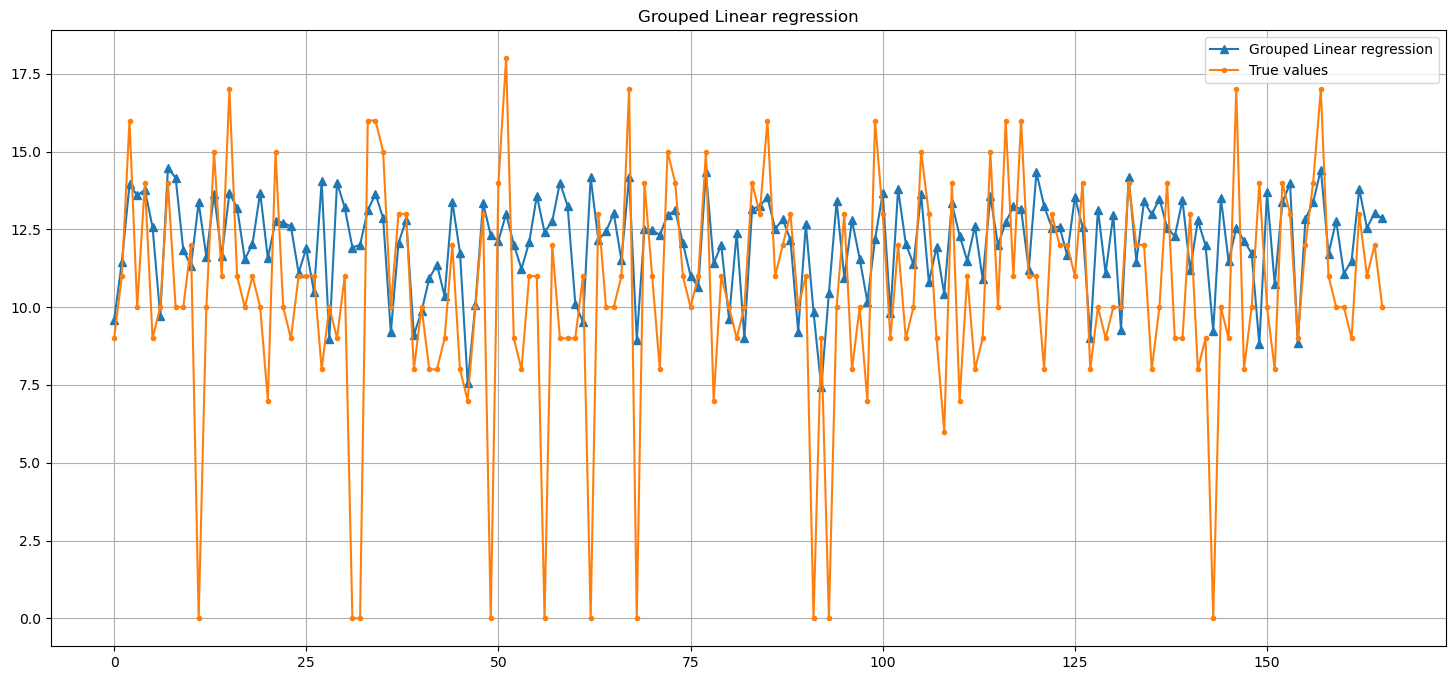

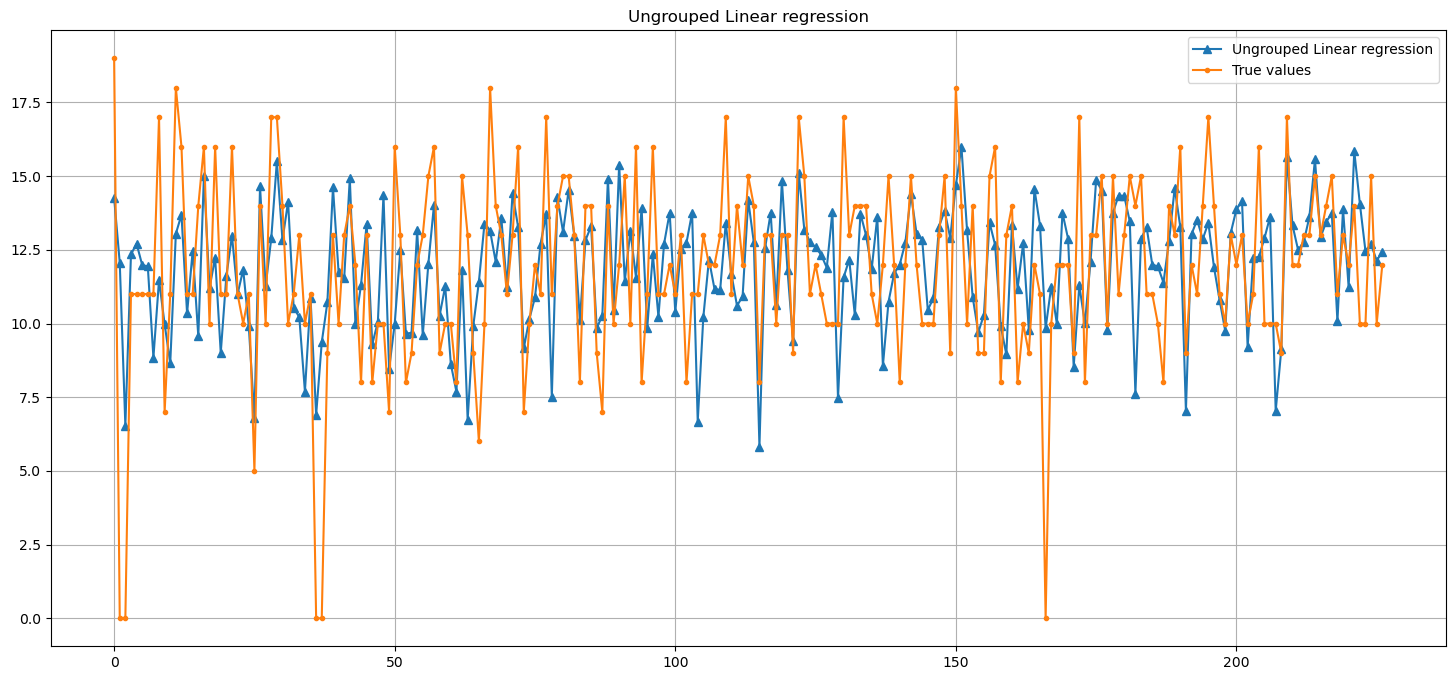

In [44]:
from sklearn.linear_model import LinearRegression
def run_lin_reg(folded):
    pipeline = Pipeline([('scaler', RobustScaler()), ('model', LinearRegression())])
    pipeline.fit(X.iloc[folded[1][0]], y.iloc[folded[1][0]])
    predicted = pipeline.predict(X.iloc[folded[1][1]])
    true_values = y.iloc[folded[1][1]]
    metrics = get_metrics(true_values, predicted)
    return pipeline, predicted, true_values, metrics

pipeline, predicted, true_values, metrics = run_lin_reg(grouped_fold)
best_r2 = (metrics, (predicted, true_values))
print(best_r2[0])
visualize(best_r2[1][1], best_r2[1][0], "Grouped Linear regression")
predicted_lin_reg = [best_r2[1][0]]
lin_reg_metric_params = [(best_r2[0]["r2"], pipeline)]

pipeline, predicted, true_values, metrics = run_lin_reg(ungrouped_fold)
best_r2 = (metrics, (predicted, true_values))
print(best_r2[0])
visualize(best_r2[1][1], best_r2[1][0], "Ungrouped Linear regression")
predicted_lin_reg.append(best_r2[1][0])
lin_reg_metric_params.append((best_r2[0]["r2"], pipeline))

## SVM

{'mse': 9.656277959453236, 'rmse': np.float64(3.107455222437362), 'mae': 1.9449336934627157, 'r2': 0.2665376768250711}
{'mse': 6.476902541196389, 'rmse': np.float64(2.544975941182232), 'mae': 1.7589428631215454, 'r2': 0.3557977319230452}


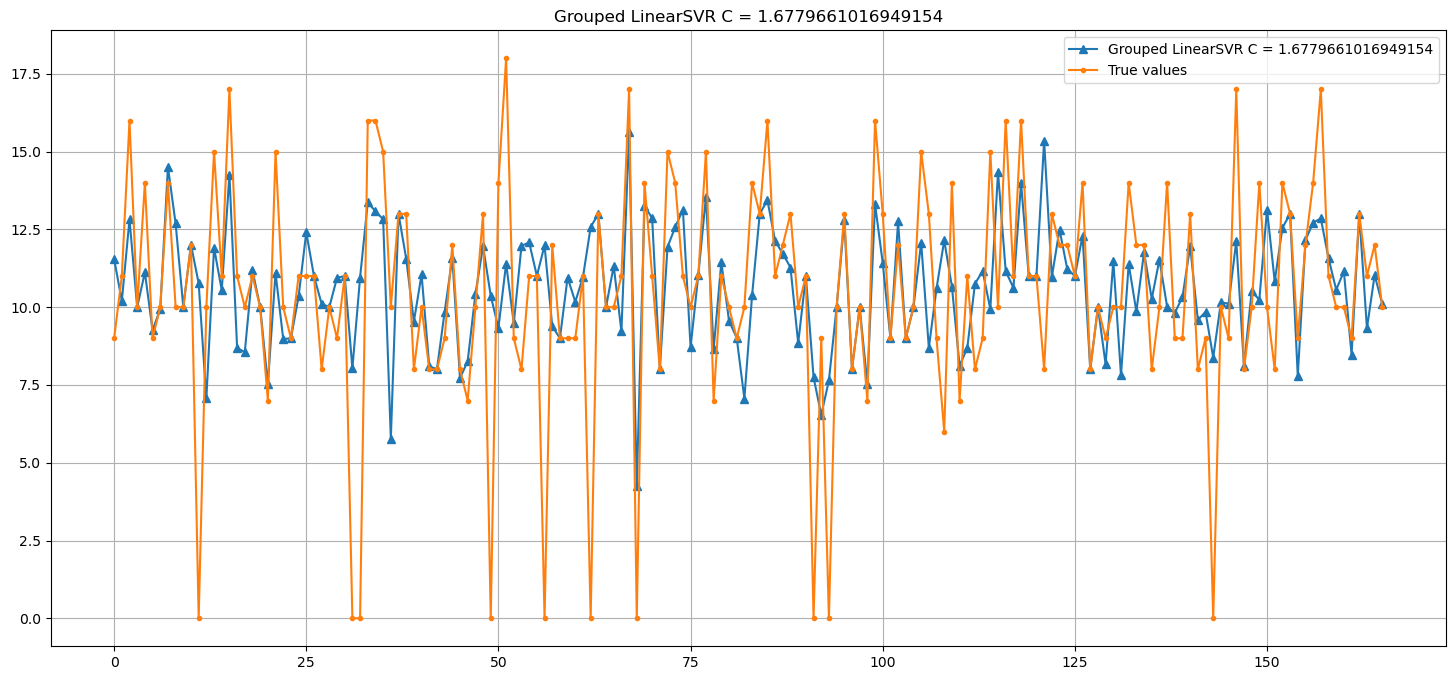

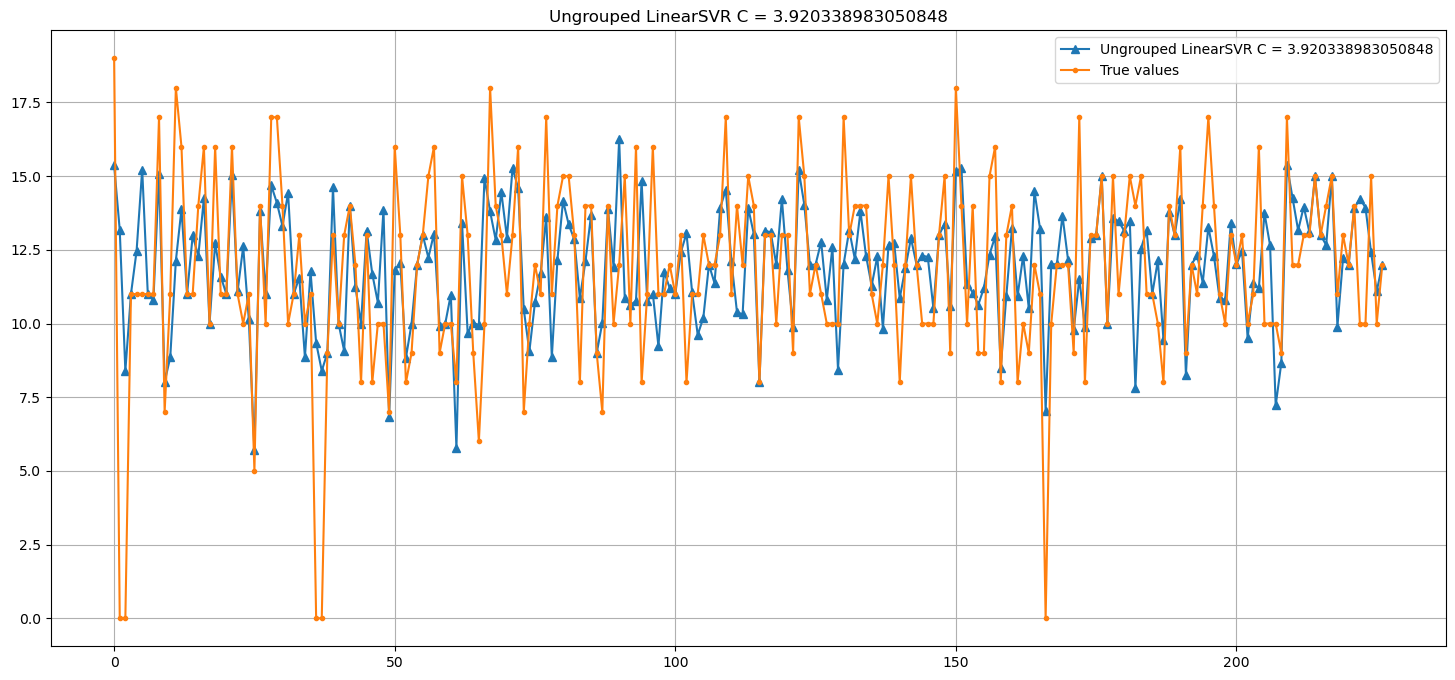

In [45]:
from sklearn.svm import LinearSVR

def run_svm(folded, C):
    pipeline = Pipeline([('scaler', RobustScaler()), ('model', LinearSVR(C=C, max_iter=10000))])
    pipeline.fit(X.iloc[folded[0][0]], y.iloc[folded[0][0]])
    predicted = pipeline.predict(X.iloc[folded[1][1]])
    true_values = y.iloc[folded[1][1]]
    metrics = get_metrics(true_values, predicted)
    return pipeline, predicted, true_values, metrics

best_r2 = ({"r2": -100}, None)
for C in np.linspace(0.1, 5, 60):
    pipeline, predicted, true_values, metrics = run_svm(grouped_fold, C=C)
    if metrics["r2"] > best_r2[0]["r2"]:
        best_r2 = (metrics, (predicted, true_values, C))
print(best_r2[0])
visualize(best_r2[1][1], best_r2[1][0], f"Grouped LinearSVR C = {best_r2[1][2]}")
predicted_svm = [best_r2[1][0]]
svm_metric_params = [(best_r2[0]["r2"], pipeline)]

best_r2 = ({"r2": -100}, None)
for C in np.linspace(0.1, 5, 60):
    pipeline, predicted, true_values, metrics = run_svm(ungrouped_fold, C=C)
    if metrics["r2"] > best_r2[0]["r2"]:
        best_r2 = (metrics, (predicted, true_values, C))
print(best_r2[0])
visualize(best_r2[1][1], best_r2[1][0], f"Ungrouped LinearSVR C = {best_r2[1][2]}")
predicted_svm.append(best_r2[1][0])
svm_metric_params.append((best_r2[0]["r2"], pipeline))

## Постройте сложную модель на основе предыдущих четырех простых и оцените ее точность

Вариант 1. Нужно взвесить предсказания простых моделей. Предложите метод взвешивания.

{'mse': 7.200766185468584, 'rmse': np.float64(2.6834243394343327), 'mae': 2.0244462453121335, 'r2': 0.28380118751735117}


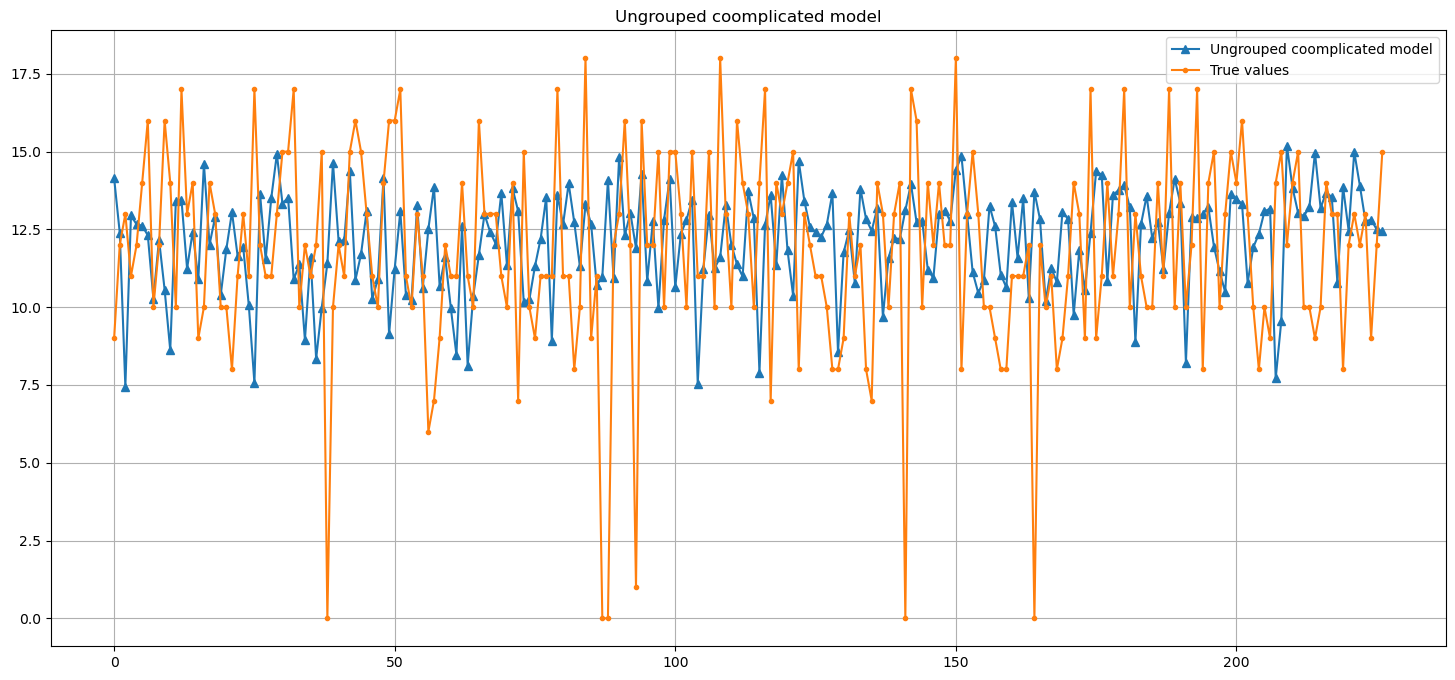

In [46]:
from sklearn.ensemble import VotingRegressor
from sklearn.pipeline import Pipeline

def create_ensemble_model(models_r2_pipelines):
    estimators = [('knn', models_r2_pipelines["knn"][1]), ('bss', models_r2_pipelines["bss"][1]), ('lin_reg', models_r2_pipelines["lin_reg"][1]), ('svm', models_r2_pipelines["svm"][1])]
    weights = [models_r2_pipelines["knn"][0], models_r2_pipelines["bss"][0], models_r2_pipelines["lin_reg"][0], models_r2_pipelines["svm"][0]]
    pipeline = Pipeline([("model", VotingRegressor(estimators=estimators,weights=weights))])
    return pipeline

compl_model_ungrouped = create_ensemble_model({"knn": knn_metric_params[1], "bss": bss_metric_params[1], "lin_reg": lin_reg_metric_params[1], "svm": svm_metric_params[1]})
compl_model_ungrouped.fit(X.iloc[ungrouped_fold[1][0]], y.iloc[ungrouped_fold[1][0]])
pred = compl_model_ungrouped.predict(X.iloc[ungrouped_fold[1][1]])
print(get_metrics(y.iloc[ungrouped_fold[1][1]], pred))
visualize(y.iloc[ungrouped_fold[0][1]], pred, "Ungrouped coomplicated model")

Вариант 2. Нужно оценить корреляцию предсказаний простых моделей.

(array([0.5, 1.5, 2.5, 3.5]),
 [Text(0, 0.5, 'knn'),
  Text(0, 1.5, 'bss'),
  Text(0, 2.5, 'lin_reg'),
  Text(0, 3.5, 'svm')])

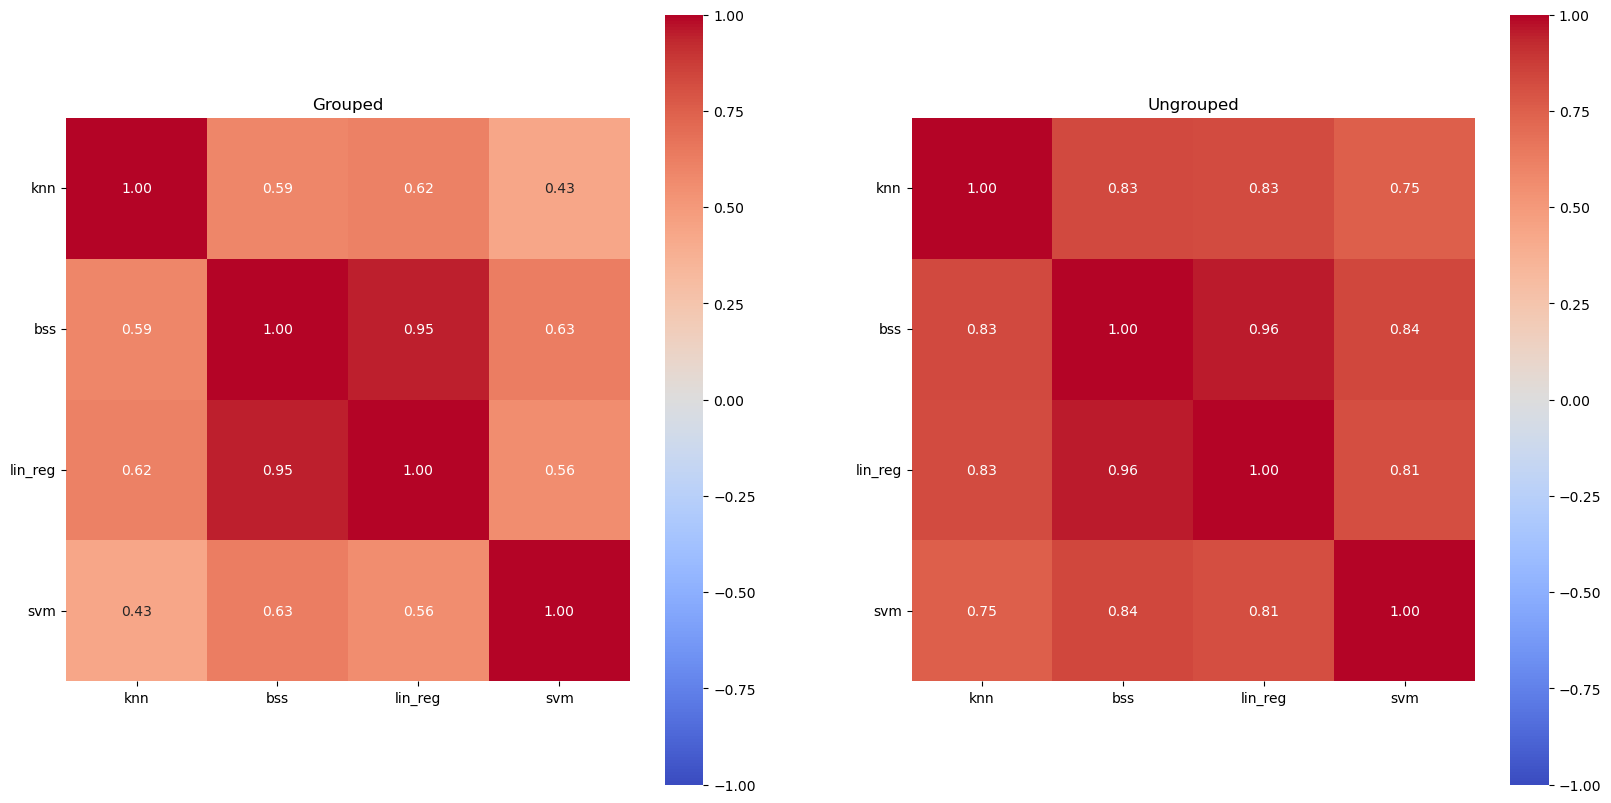

In [47]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

plt.subplot(1, 2, 1)
simple_models = pd.DataFrame({"knn": predicted_knn[0], "bss": predicted_bss[0], "lin_reg": predicted_lin_reg[0], "svm": predicted_svm[0]})
sns.heatmap(simple_models.corr(), vmin=-1, cmap="coolwarm", annot=True, fmt='.2f', square='True')
plt.title("Grouped")
plt.yticks(rotation=0)

plt.subplot(1, 2, 2)
simple_models = pd.DataFrame({"knn": predicted_knn[1], "bss": predicted_bss[1], "lin_reg": predicted_lin_reg[1], "svm": predicted_svm[1]})
sns.heatmap(simple_models.corr(), vmin=-1, cmap="coolwarm", annot=True, fmt='.2f', square='True')
plt.title("Ungrouped")
plt.yticks(rotation=0)

## Сделайте итоговое предсказание

Решением домашнего задания является данный ноутбук + .csv файл с предсказанием. Пример формата файла, который должен у вас получится приведен в ```data/sample_submission.csv```. Данные для предсказания - ```X_test.csv```.

Значения предсказаний должны быть целочисленными. Проверка будет точности решения будет по MSE.

In [48]:
X_test = pd.read_csv("X_test.csv")

In [49]:
wrong_vals = {}
for column, valid_values in valid_ranges.items():
    if column in X_test.columns:
        if callable(valid_values):
            mask = ~X_test[column].apply(valid_values)
        else:
            mask = ~X_test[column].isin(valid_values)
        wrong_vals[column] = (mask | X_test[column].isna()).sum()

wrong_vals = pd.DataFrame({'incorrect_values': wrong_vals})
print(wrong_vals.sort_values('incorrect_values', ascending=False)[wrong_vals["incorrect_values"] != 0])
with_compl = X_test.drop(["Walc", "Medu", "address", "higher"], axis=1)
print(with_compl.columns)

X_base = X_test.copy()
X_base['study_life_balance'] = (
        X_base['studytime'] - 
        (X_base['freetime'] + X_base['goout']) / 2
    )
X_base['total_alcohol_index'] = (
        X_base['Dalc'] * 5 +
        X_base['Walc'] * 2
    )

categorical_columns = X_base.select_dtypes(include=['object']).columns
binary_mappings = {}

for col in categorical_columns:
    unique_values = sorted(X_base[col].unique())
    if len(unique_values) == 2:
        mapping = {unique_values[0]: 0, unique_values[1]: 1}
        X_base[col] = X_base[col].map(mapping)
        binary_mappings[col] = mapping
        print(f" {col}: {mapping}")

label_encoders = {}
other_categorical = [col for col in categorical_columns if col not in binary_mappings]

for col in other_categorical:
    le = LabelEncoder()
    X_base[col] = le.fit_transform(X_base[col].astype(str))
    label_encoders[col] = le

Empty DataFrame
Columns: [incorrect_values]
Index: []
Index(['school', 'sex', 'age', 'famsize', 'Pstatus', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'health', 'absences'], dtype='object')
 school: {'GP': 0, 'MS': 1}
 sex: {'F': 0, 'M': 1}
 address: {'R': 0, 'U': 1}
 famsize: {'GT3': 0, 'LE3': 1}
 Pstatus: {'A': 0, 'T': 1}
 schoolsup: {'no': 0, 'yes': 1}
 famsup: {'no': 0, 'yes': 1}
 paid: {'no': 0, 'yes': 1}
 activities: {'no': 0, 'yes': 1}
 nursery: {'no': 0, 'yes': 1}
 higher: {'no': 0, 'yes': 1}
 internet: {'no': 0, 'yes': 1}
 romantic: {'no': 0, 'yes': 1}


In [50]:
submission = pd.read_csv('sample_submission.csv', index_col='id')
pred = compl_model_ungrouped.predict(X_base)
submission['id'] = np.arange(len(pred))
submission['G3'] = pred.round(0).astype(int)
submission.to_csv('submission.csv', index=False)

# Часть 6. Состязательная валидация (Adversarial Validation)

Данная стратегия часто применяется в соревнованиях по машинному обучению. Так как проверить свой алгоритм возможно только на заданном тренировочном наборе данных, а результат требуется к набору, для которого нет ответов, то выбирают следующий подход:
- оценить степень схожести тренировочных и тестовых данных;
- составить валидацию из тех тренировочных данных, которые больше похожи на тестовые.

Алгоритм реализации AV:
1. Удаляем ответы из тренировочных данных.
2. Добавляем специальные метки (```is_test```) для классов: тренировочные данные и тестовые.
То есть у тестовых данных будет значение ```is_test = 1```, а у тренировочных ```is_test = 0```.
4. Учим алгоритм классификации предсказывать заданную метку ```is_test```.
5. Делим тренировочные данные на N частей и проводим кросс-валидацию.

Обучаем N алгоритмов классификации: каждый обучается на всех тестовых данных и на N-1 наборах тренировочных. Предсказываем на 1 тренировочном наборе.

6. Для каждого элемента в выборке предсказываем вероятность принадлежности класса и сортируем тренировочные данные по вероятности принадлежности тестовой выборке.
7. Выделяем заданное число данных в валидацию.
8. Обучаемся для итогового предсказания на всех данных.
9. Смотрим метрики AUC-ROC

Test dataset shape: (195, 32)
Train dataset shape: (454, 32)
Объединенный датасет: (649, 33)
test samples: 195
train samples: 454
AUC-ROC Score: 0.47
Датасеты очень похожи по распределениям. test и train студенты имеют схожие характеристики

Общий вывод: 0.469 AUC указывает на то, что датасеты очень похожи.


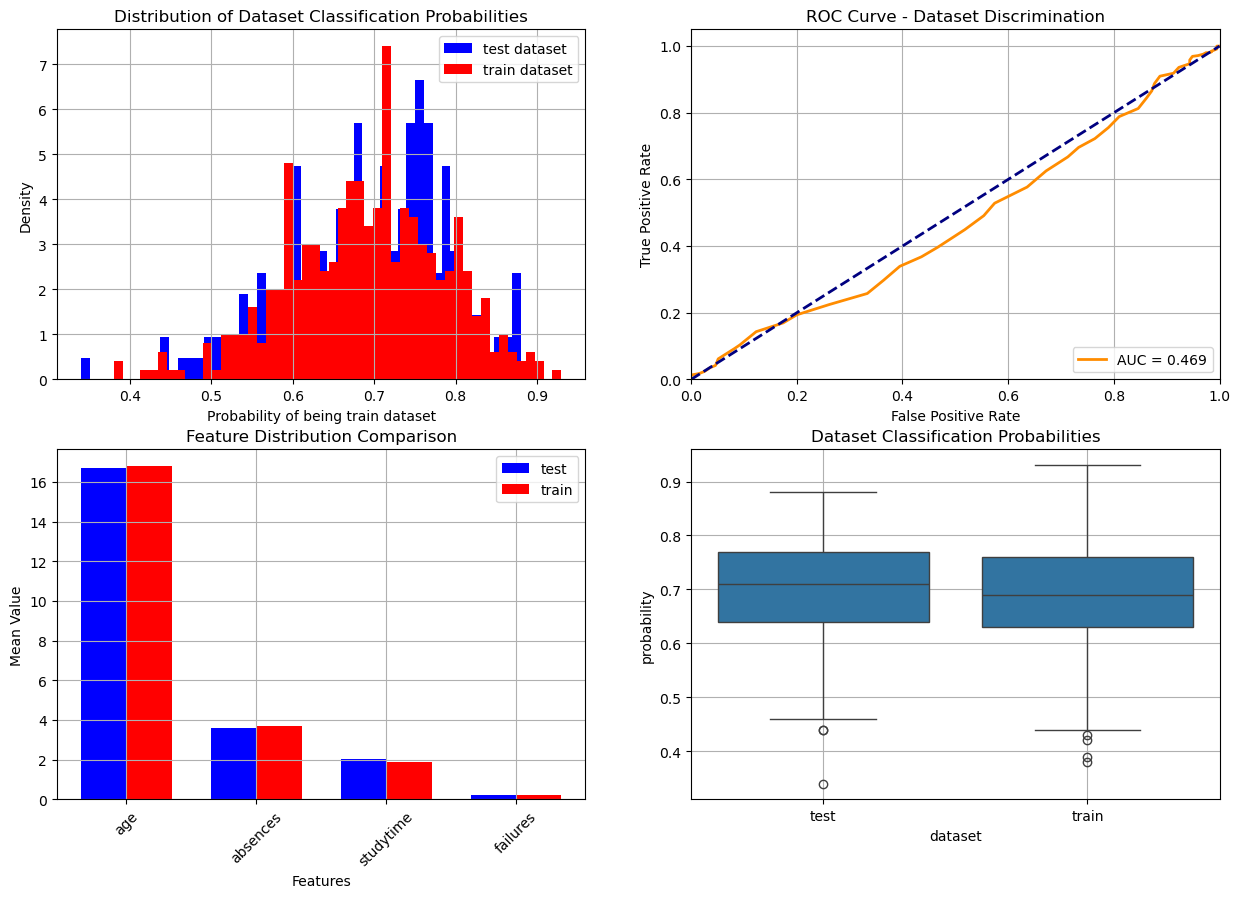

In [51]:
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve


df_test = X_base
df_train = X
print(f"Test dataset shape: {df_test.shape}")
print(f"Train dataset shape: {df_train.shape}")

def preprocess_data(df):
    df_processed = df.copy()
    categorical_columns = df_processed.select_dtypes(include=['object']).columns
    for col in categorical_columns:
        le = LabelEncoder()
        df_processed[col] = le.fit_transform(df_processed[col].astype(str))
    return df_processed

test_processed = preprocess_data(df_test)
train_processed = preprocess_data(df_train)
common_columns = test_processed.columns.intersection(train_processed.columns)
test_processed = test_processed[common_columns]
train_processed = train_processed[common_columns]

test_processed['dataset'] = 0
train_processed['dataset'] = 1
combined_data = pd.concat([test_processed, train_processed], ignore_index=True)
y_combined = combined_data['dataset']
X_combined = combined_data.drop('dataset', axis=1)
print(f"Объединенный датасет: {combined_data.shape}")
print(f"test samples: {len(test_processed)}")
print(f"train samples: {len(train_processed)}")

model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
dataset_proba = cross_val_predict(model, X_combined, y_combined, cv=cv, method='predict_proba', n_jobs=-1)

train_proba = dataset_proba[:, 1]
test_proba = train_proba[:len(test_processed)]
train_proba_values = train_proba[len(test_processed):]
fpr, tpr, _ = roc_curve(y_combined, train_proba)
auc_score = roc_auc_score(y_combined, train_proba)

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.hist(test_proba, bins=50, label='test dataset', color='blue', density=True)
plt.hist(train_proba_values, bins=50, label='train dataset', color='red', density=True)
plt.xlabel('Probability of being train dataset')
plt.ylabel('Density')
plt.title('Distribution of Dataset Classification Probabilities')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {auc_score:.3f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Dataset Discrimination')
plt.legend(loc="lower right")
plt.grid(True)

plt.subplot(2, 2, 3)
important_features = ['age', 'absences', 'G1', 'G2', 'G3', 'studytime', 'failures']
feature_comparison = []
for feature in important_features:
    if feature in df_test.columns and feature in df_train.columns:
        test_mean = df_test[feature].mean()
        train_mean = df_train[feature].mean()
        feature_comparison.append({'feature': feature, 'test': test_mean, 'train': train_mean, 'difference': abs(test_mean - train_mean)})
feature_df = pd.DataFrame(feature_comparison)
x = np.arange(len(feature_df))
width = 0.35
plt.bar(x - width/2, feature_df['test'], width, label='test', color='blue')
plt.bar(x + width/2, feature_df['train'], width, label='train', color='red')
plt.xlabel('Features')
plt.ylabel('Mean Value')
plt.title('Feature Distribution Comparison')
plt.xticks(x, feature_df['feature'], rotation=45)
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 4)
prob_data = pd.DataFrame({'dataset': ['test'] * len(test_proba) + ['train'] * len(train_proba_values), 'probability': np.concatenate([test_proba, train_proba_values])})
sns.boxplot(x='dataset', y='probability', data=prob_data)
plt.title('Dataset Classification Probabilities')
plt.grid(True)

print(f"AUC-ROC Score: {auc_score:.2f}")
if auc_score > 0.7:
    print("Датасеты имеют значительные различия в распределениях! Модель легко отличает test от train студентов.")
elif auc_score > 0.6:
    print("Обнаружены заметные различия между датасетами. Есть некоторые особенности, которые отличают test и train студентов")
elif auc_score > 0.55:
    print("Небольшие различия между датасетами. Датасеты в целом похожи, но есть minor различия")
else:
    print("Датасеты очень похожи по распределениям. test и train студенты имеют схожие характеристики")

print(f"\nОбщий вывод: {auc_score:.3f} AUC указывает на то, что датасеты {'сильно различаются' if auc_score > 0.7 else 'умеренно различаются' if auc_score > 0.6 else 'незначительно различаются' if auc_score > 0.55 else 'очень похожи'}.")